In [1]:
#!jupyter nbextension install --user https://rawgithub.com/minrk/ipython_extensions/master/nbextensions/toc.js
#!curl -L https://rawgithub.com/minrk/ipython_extensions/master/nbextensions/toc.css > $(jupyter --data-dir)/nbextensions/toc.css

In [2]:
#!jupyter nbextension enable toc

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
#sns.set()
%matplotlib inline

In [2]:
def about_outliers(series):
    print('Num of rows:')
    print(series.shape[0])
    desr=series.describe()
    upper_bound=desr['75%']+1.5*(desr['75%']-desr['25%'])
    lower_bound=desr['25%']-1.5*(desr['75%']-desr['25%'])
    print('Num of normal rows:')
    print(len(series.loc[(series<upper_bound)&(series>lower_bound)]))
    print('Num of outliers:')
    print(len(series.loc[(series>upper_bound)|(series<lower_bound)]))

In [3]:
data=pd.read_csv('data/Dataset/Dataset/Training/Features_Variant_1.csv', header=None).drop_duplicates()

In [4]:
#get and fit features names
features_names=np.array(['page_likes_num',#1
               'page_checkins',#2
               'page_talking_about',#3
                'page_cat',#4
                'page_statistics',#5-29 #mean, avg etc.
                'comments_num_before_base_time',#30
                'comments_num_in_last_24_hours',#31 #last day
                'comments_num_in_last_48_to_24_hours',#32 #day before last
                'comments_num_in_first_24_hours',#33
                'comments_difference_in_last_two_days', #34 (32-31)
                         
                'base_time', #35
                'character_num_in_post', #36
                'share_num',#37
                'post_promotion', #38 binary
                'h_local', #39 This describes the H hrs, for which we have the target variable/ comments received. 
                'post_published_weekday', #40-46 This represents the day(Sunday...Saturday) on which the post was published. 
                'base_ditetime_weekday', #47-53 This represents the day(Sunday...Saturday) on selected base Date/Time. 
                'target' #54 The no of comments in next H hrs(H is given in Feature no 39).                
               ])

for index in range(5,29):
    features_names=np.insert(features_names, index, features_names[4]+'_'+str(index-4))
    
weekday=('sunday', 'monday','tuesday', 'wednesday', 'thursday', 'friday', 'saturday')    

for index in range(40,47):
    features_names=np.insert(features_names,index, features_names[39]+'_'+ weekday[index-40])
features_names=np.delete(features_names, 39)

for index in range(47,54):
    features_names=np.insert(features_names,index, features_names[46]+'_'+ weekday[index-47])
features_names=np.delete(features_names, 46)

data.columns=features_names

In [5]:
data=data.drop(columns=['post_promotion'])

# vis

## numeric values

### page_likes_num

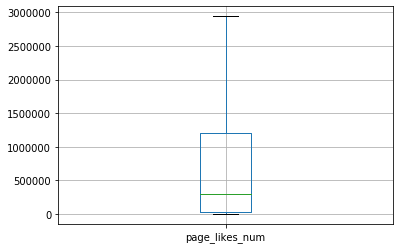

In [8]:
#data['page_likes_num'] #float
boxplot = data.boxplot(column=['page_likes_num'], showfliers=False)

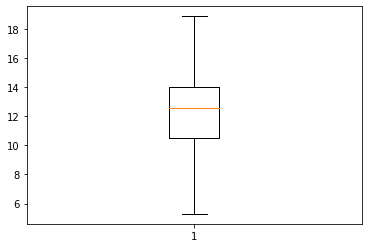

In [9]:
#try make log
tmp=np.log(data['page_likes_num'])
plt.boxplot(tmp, showfliers=False)
plt.show()

In [10]:
"""
tmp=np.log(data['page_likes_num'])
plt.boxplot(tmp)
plt.show()
"""

"\ntmp=np.log(data['page_likes_num'])\nplt.boxplot(tmp)\nplt.show()\n"

In [11]:
about_outliers(data['page_likes_num'])

Num of rows:
40941
Num of normal rows:
35859
Num of outliers:
5082


In [12]:
ser_tmp=pd.Series(tmp, name='tmp')
about_outliers(ser_tmp)

Num of rows:
40941
Num of normal rows:
40838
Num of outliers:
103


In [13]:
print('Num of rows:')
print(len(tmp))
desr=tmp.describe()
upper_bound=desr['75%']+3*(desr['75%']-desr['25%'])
lower_bound=desr['25%']-3*(desr['75%']-desr['25%'])
print('Num of normal rows:')
print(len(ser_tmp.loc[(ser_tmp<upper_bound)&(ser_tmp>lower_bound)]))
print('Num of outliers:')
print(len(ser_tmp.loc[(ser_tmp>upper_bound)|(ser_tmp<lower_bound)]))

Num of rows:
40941
Num of normal rows:
40941
Num of outliers:
0


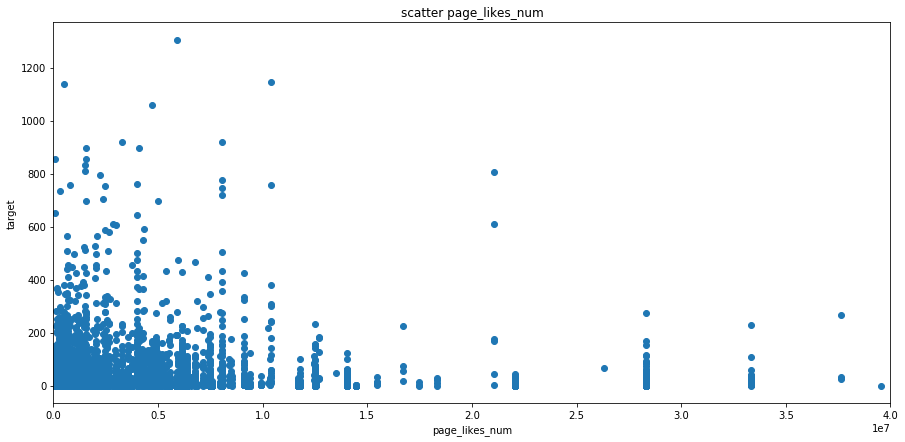

In [14]:

plt.figure(figsize=(15,7))
plt.scatter(x=data['page_likes_num'], y=data['target'])
plt.xlim(0,0.4e8)
plt.xlabel('page_likes_num')
plt.ylabel('target')
plt.title('scatter page_likes_num')
plt.show()


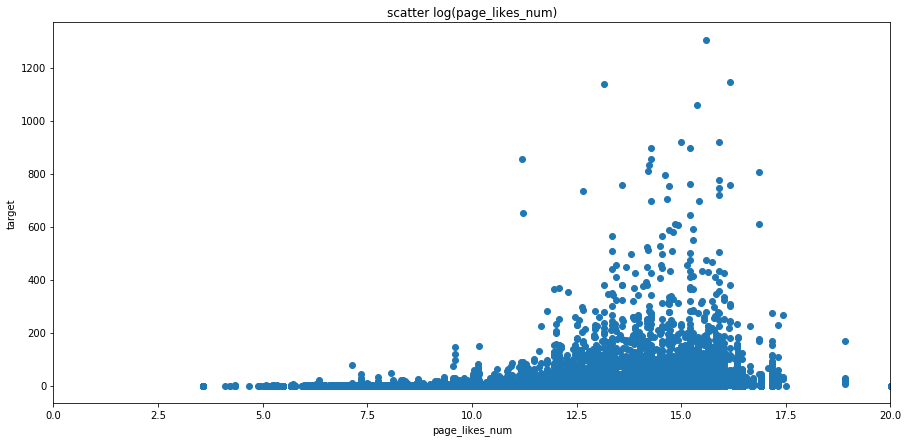

In [15]:

plt.figure(figsize=(15,7))
plt.scatter(x=tmp, y=data['target'])
plt.xlim(0,20)
plt.xlabel('page_likes_num')
plt.ylabel('target')
plt.title('scatter log(page_likes_num)')
plt.show();


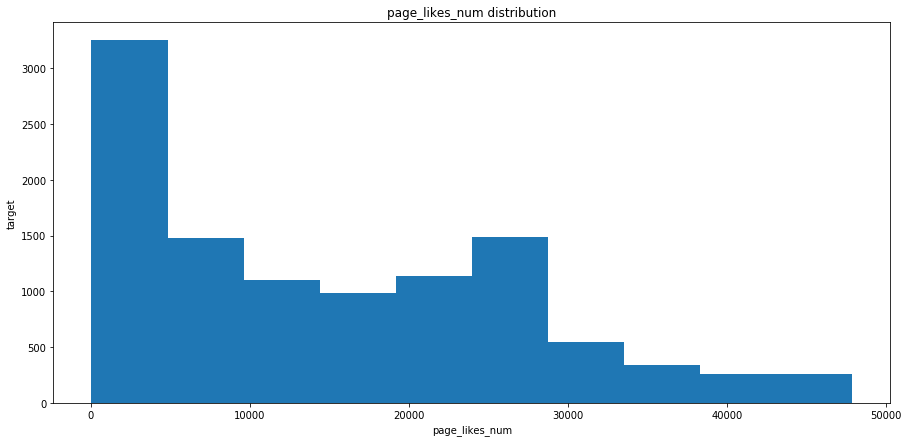

In [16]:
plt.figure(figsize=(15,7))
tmp2=data['page_likes_num'].loc[data['page_likes_num']<0.5e5]
plt.hist(x=tmp2)
plt.xlabel('page_likes_num')
plt.ylabel('target')
plt.title('page_likes_num distribution')
plt.show()

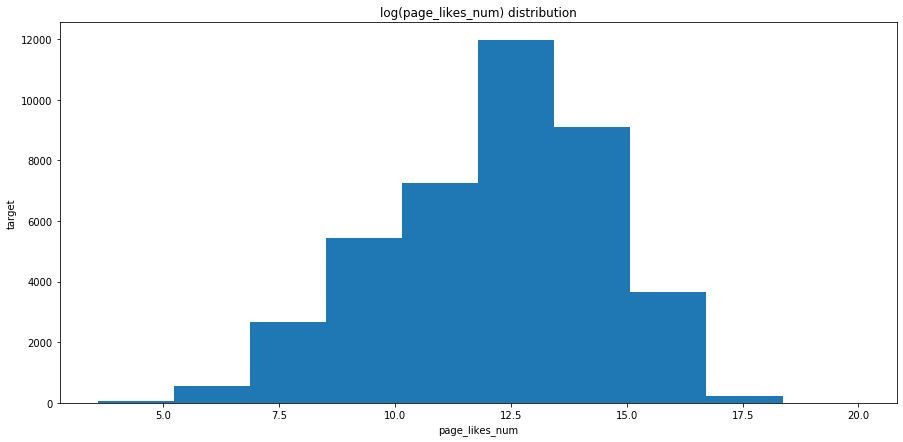

In [17]:
plt.figure(figsize=(15,7))
plt.hist(x=tmp)
plt.xlabel('page_likes_num')
plt.ylabel('target')
plt.title('log(page_likes_num) distribution')
plt.show()

### 'page_checkins' 

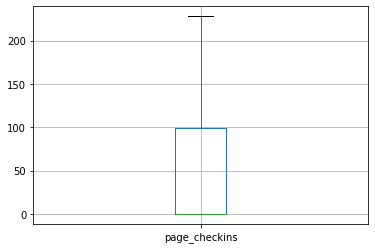

In [18]:
boxplot = data.boxplot(column=['page_checkins'], showfliers=False)

In [19]:
about_outliers(data['page_checkins'])

Num of rows:
40941
Num of normal rows:
32871
Num of outliers:
8070


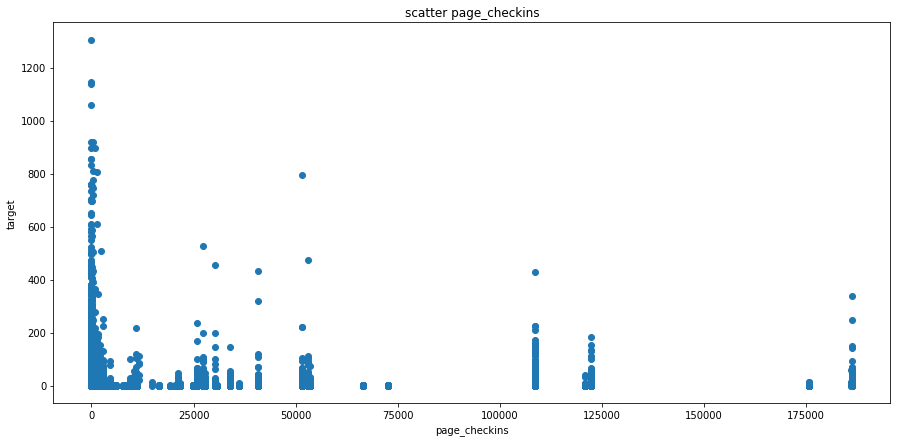

In [20]:

plt.figure(figsize=(15,7))
plt.scatter(x=data['page_checkins'], y=data['target'])
plt.xlabel('page_checkins')
plt.ylabel('target')
plt.title('scatter page_checkins')
plt.show()


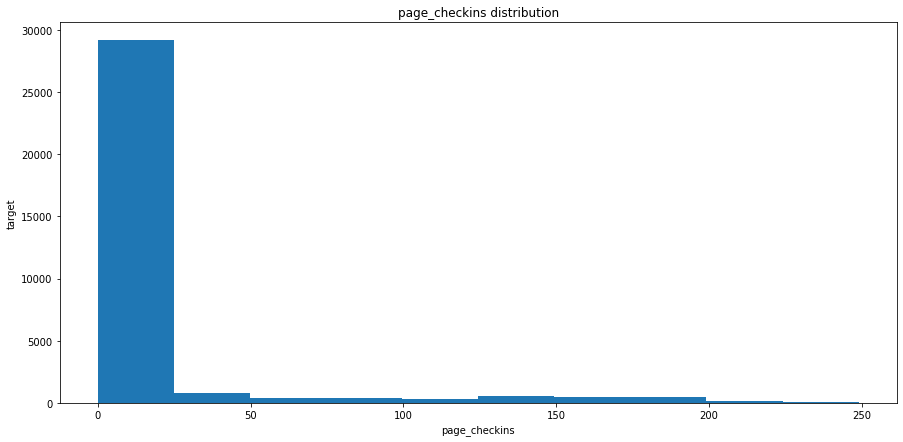

In [21]:
plt.figure(figsize=(15,7))
tmp2=data['page_checkins'].loc[data['page_checkins']<250]
plt.hist(x=tmp2)
plt.xlabel('page_checkins')
plt.ylabel('target')
plt.title('page_checkins distribution')
plt.show()

In [22]:
print('Size:')
print(data['page_checkins'].shape[0])
print('Amount of zero values:')
print(data['page_checkins'].loc[data['page_checkins']==0].shape[0])

Size:
40941
Amount of zero values:
25485


### page_talking_about 

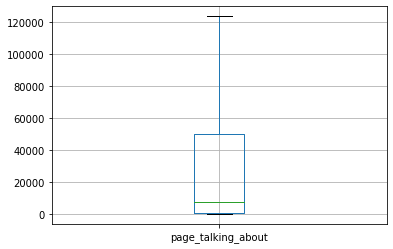

In [23]:
boxplot = data.boxplot(column=['page_talking_about'], showfliers=False)

/home/svetlana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


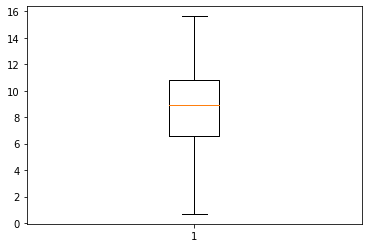

In [24]:
#try make log
tmp=np.log(data['page_talking_about'])
plt.boxplot(tmp, showfliers=False)
plt.show()

In [25]:
about_outliers(data['page_talking_about'])

Num of rows:
40941
Num of normal rows:
37314
Num of outliers:
3627


In [26]:
about_outliers(pd.Series(tmp, name='tmp'))

Num of rows:
40941
Num of normal rows:
39801
Num of outliers:
1140


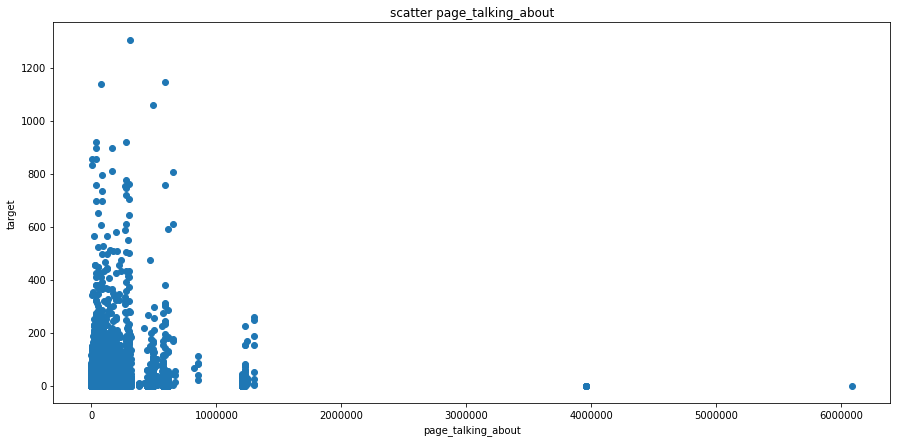

In [27]:
plt.figure(figsize=(15,7))
plt.scatter(x=data['page_talking_about'], y=data['target'])
plt.xlabel('page_talking_about')
plt.ylabel('target')
plt.title('scatter page_talking_about')
plt.show()

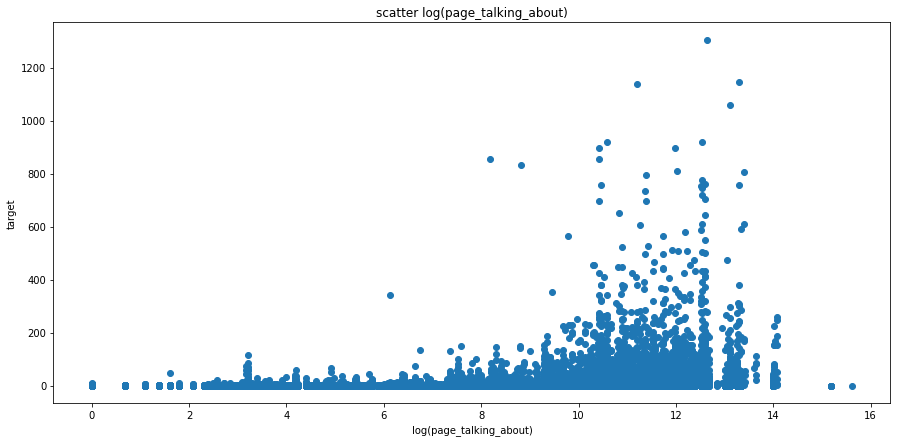

In [28]:
plt.figure(figsize=(15,7))
plt.scatter(x=tmp, y=data['target'])
plt.xlabel('log(page_talking_about)')
plt.ylabel('target')
plt.title('scatter log(page_talking_about)')
plt.show()

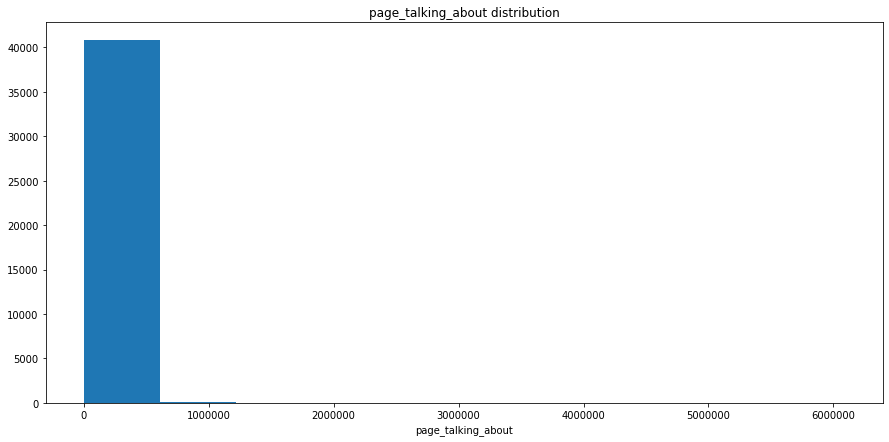

In [29]:
plt.figure(figsize=(15,7))
plt.hist(x=data['page_talking_about'])
plt.xlabel('page_talking_about')
plt.title('page_talking_about distribution')
plt.show()

In [30]:
tmp.loc[tmp==-np.inf]=-100

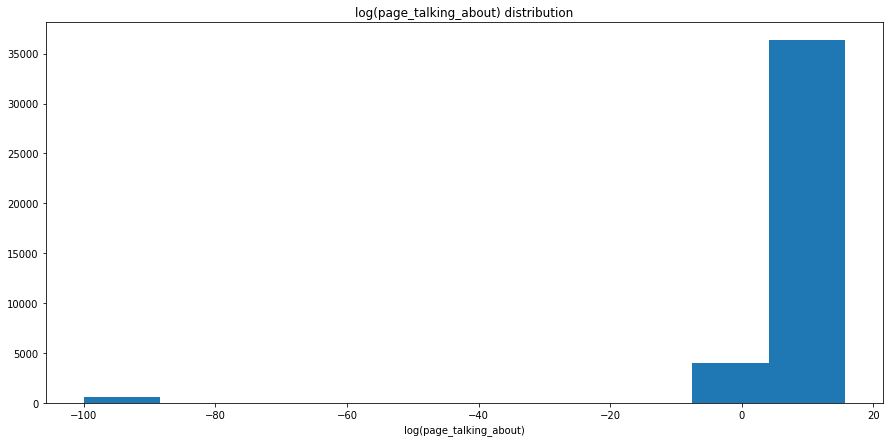

In [31]:
plt.figure(figsize=(15,7))

plt.hist(x=tmp)
plt.xlabel('log(page_talking_about)')
plt.title('log(page_talking_about) distribution')
plt.show()

### 'page_statistics' 5-29 cols

In [32]:
names=data.columns[data.columns.astype(str).str.contains('page_statistics')==True]

Text(0.5, 1.05, 'Correlation Matrix')

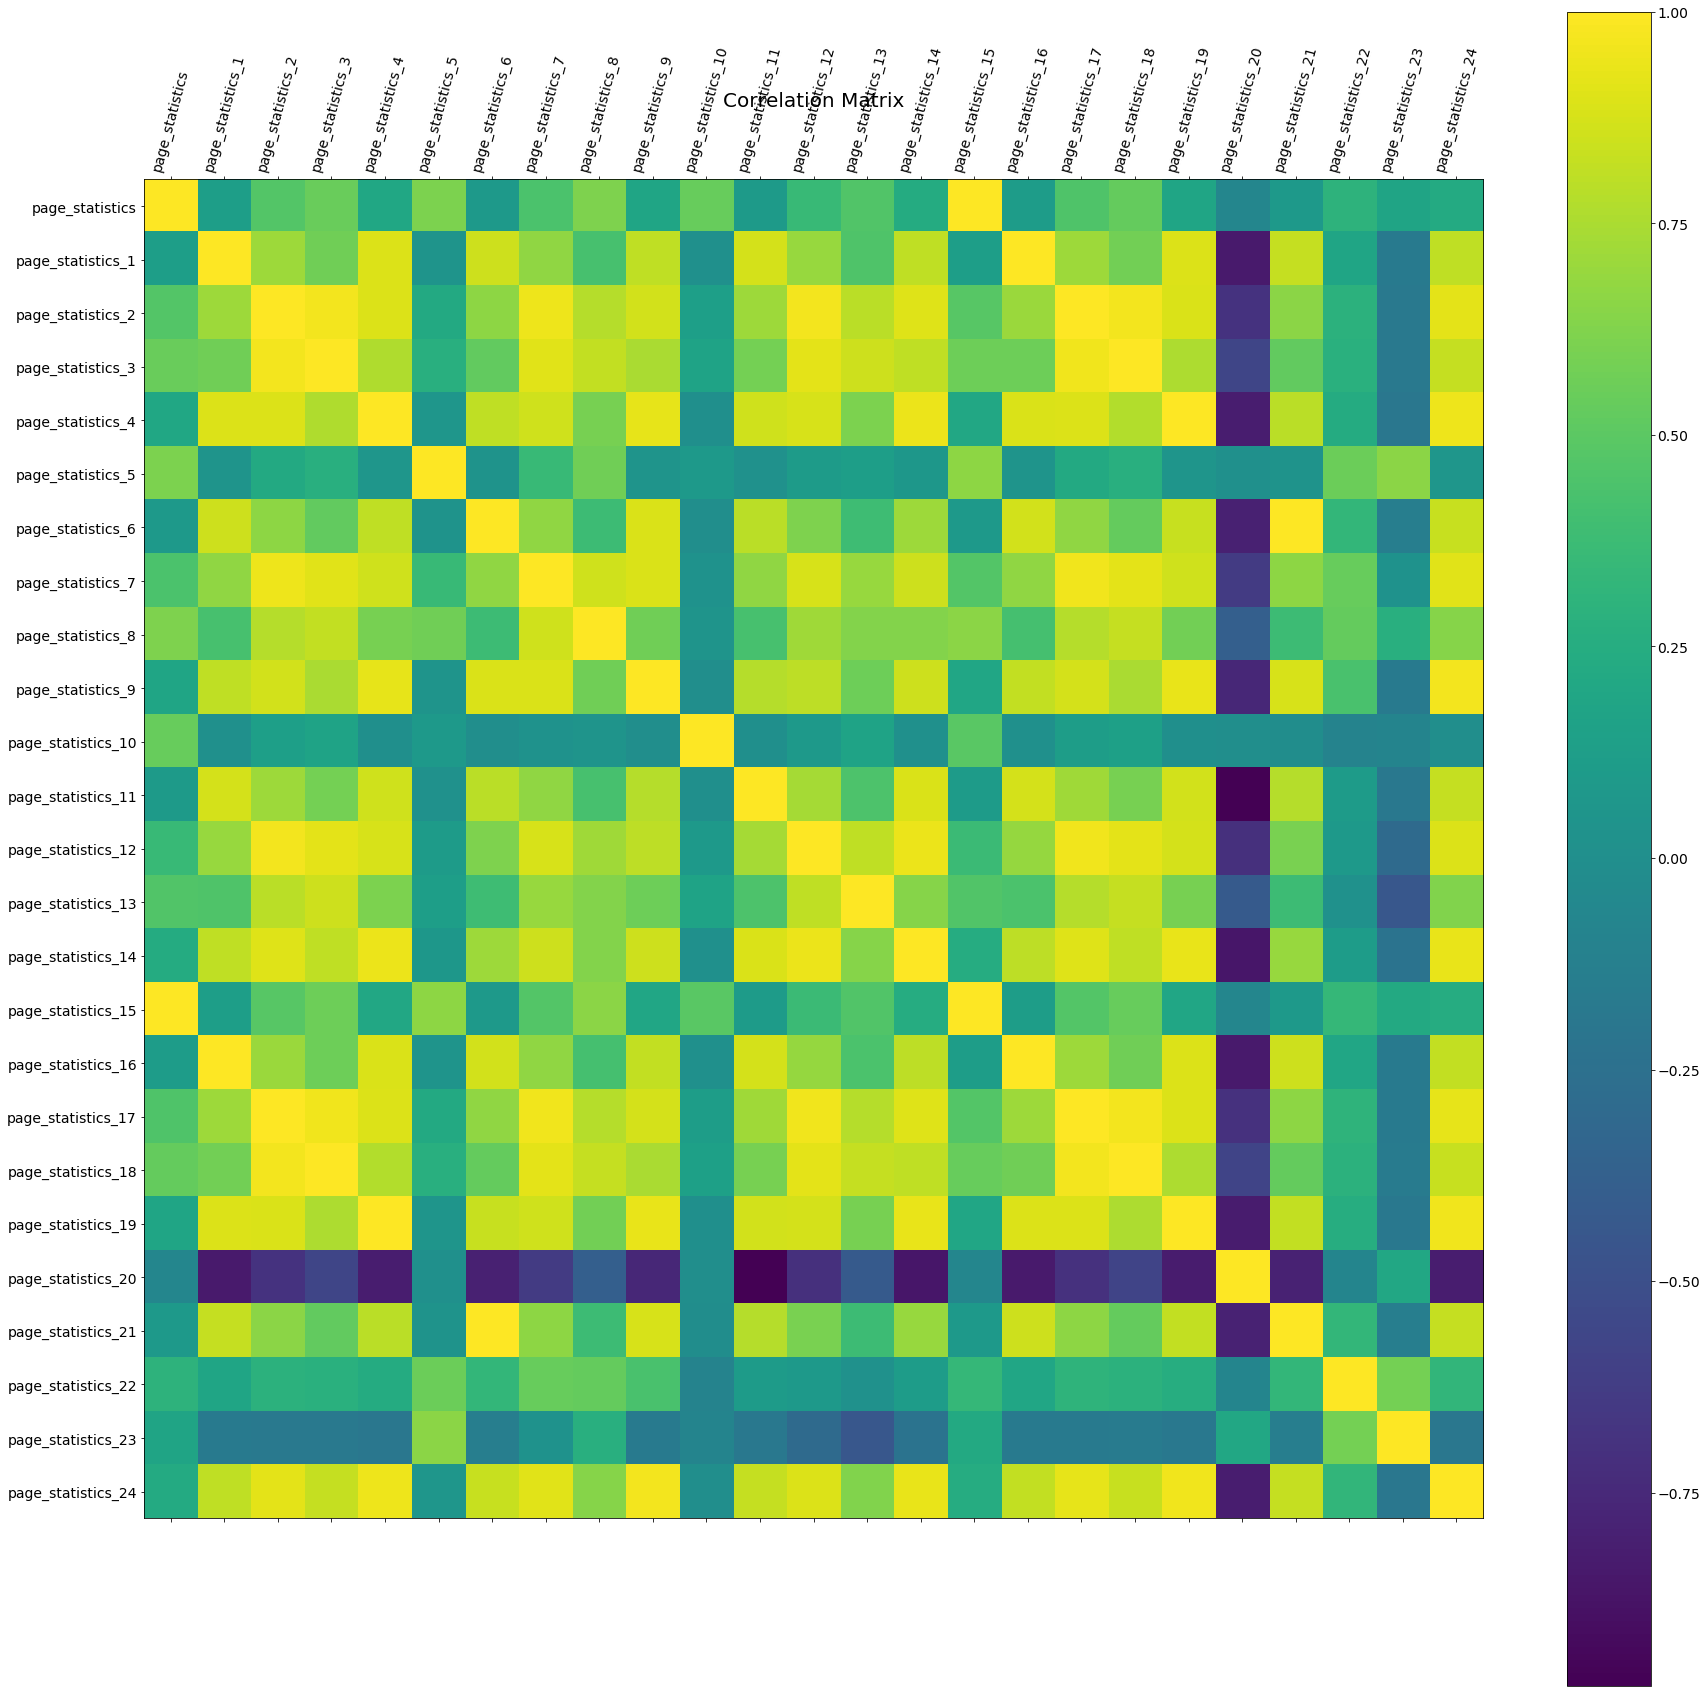

In [33]:
f=plt.figure(figsize=(30, 30))

plt.matshow(data[names].corr(), fignum=f.number)
plt.xticks(range(data[names].shape[1]), names, fontsize=14, rotation=75)
plt.yticks(range(data[names].shape[1]), names, fontsize=14)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

plt.title('Correlation Matrix', fontsize=20)

In [34]:
nums=np.array([1, 2, 11, 20, 22, 23],dtype=str)
names=['page_statistics_'+n for n in nums]

In [35]:
print(data.loc[data['page_statistics']==0].shape[0])
print(data.loc[data['page_statistics_15']==0].shape[0])
print(data.loc[data['page_statistics_5']==0].shape[0])
print(data.loc[data['page_statistics_10']==0].shape[0])

37391
37480
40239
40915


In [36]:
print(data.loc[data['page_statistics_23']==0].shape[0])

20043


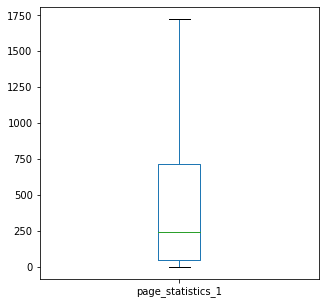

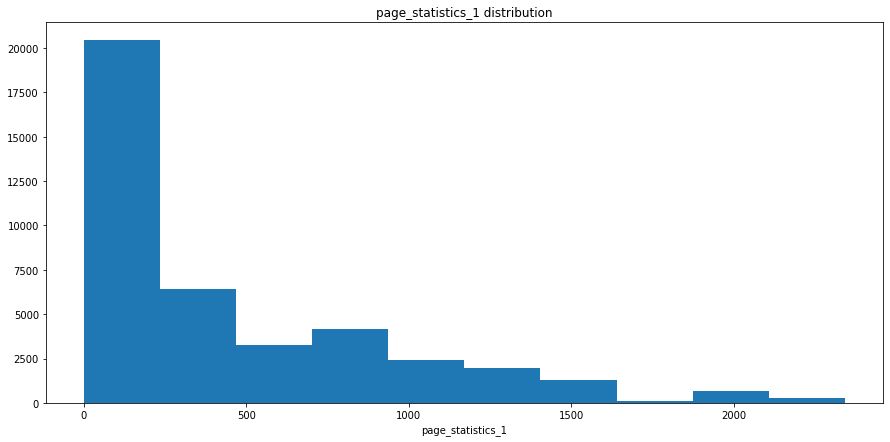

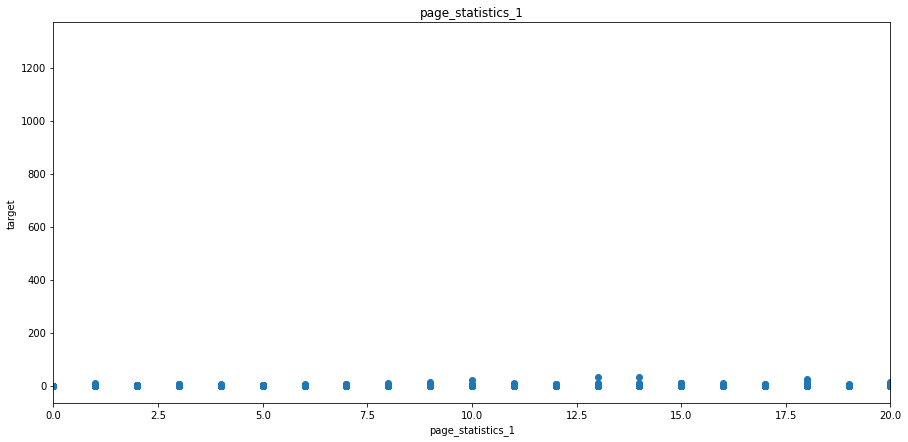

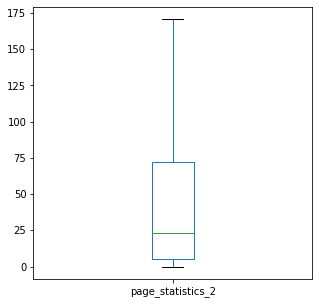

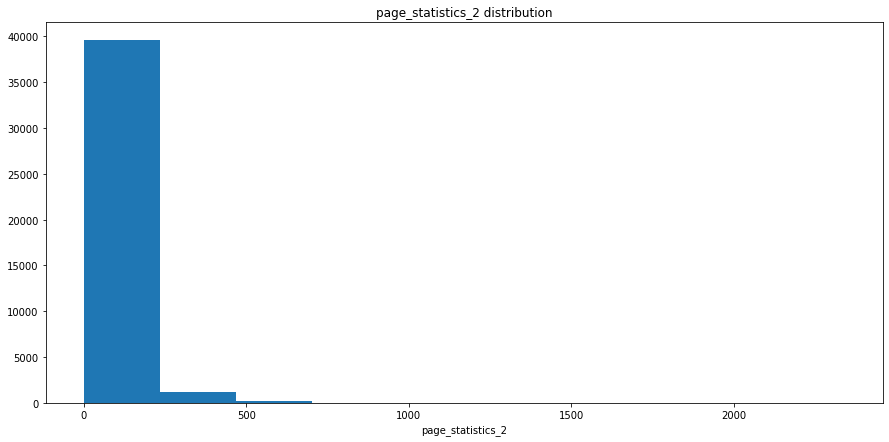

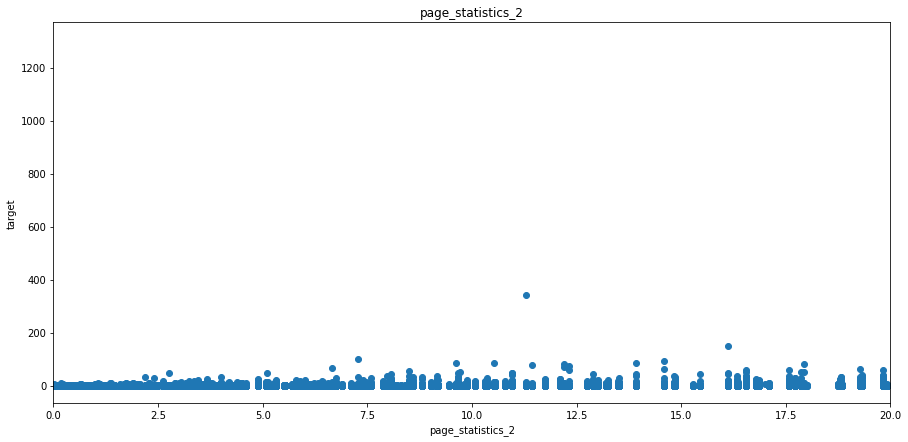

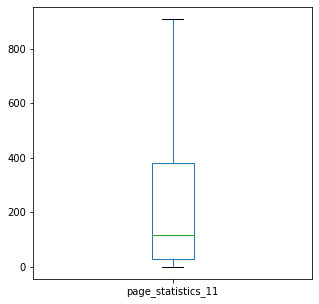

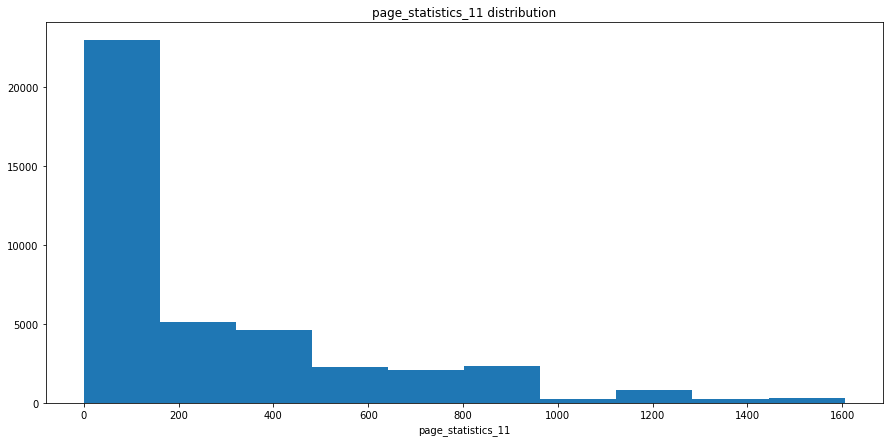

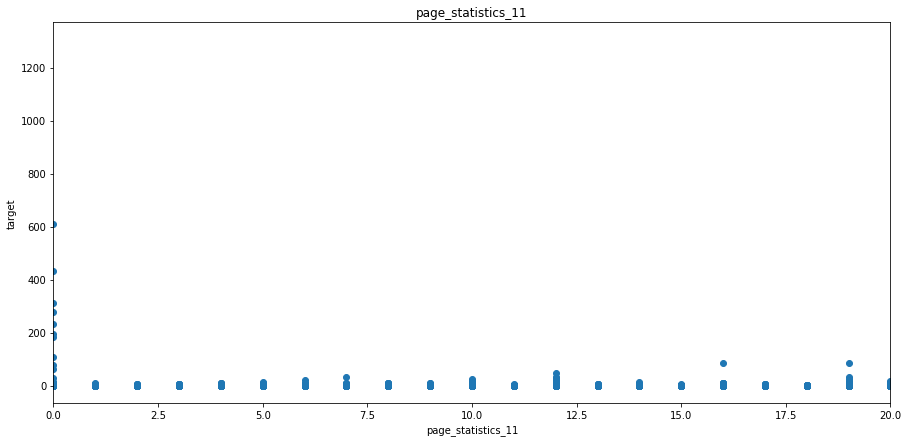

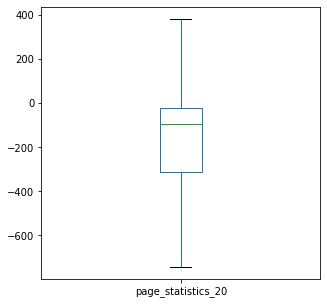

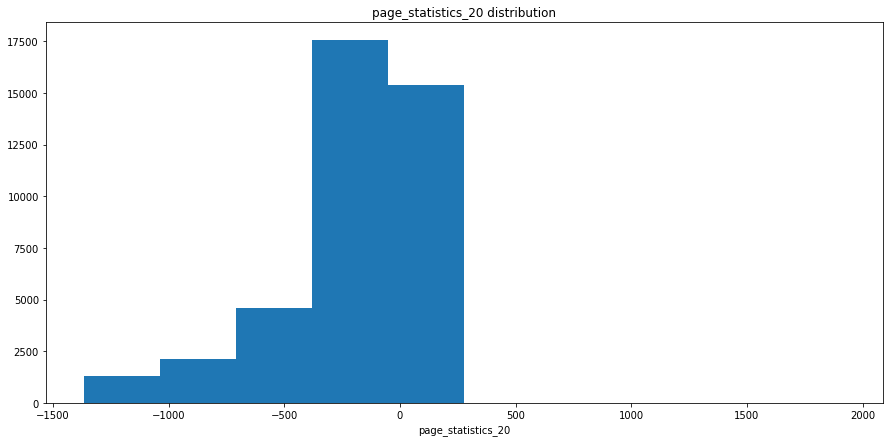

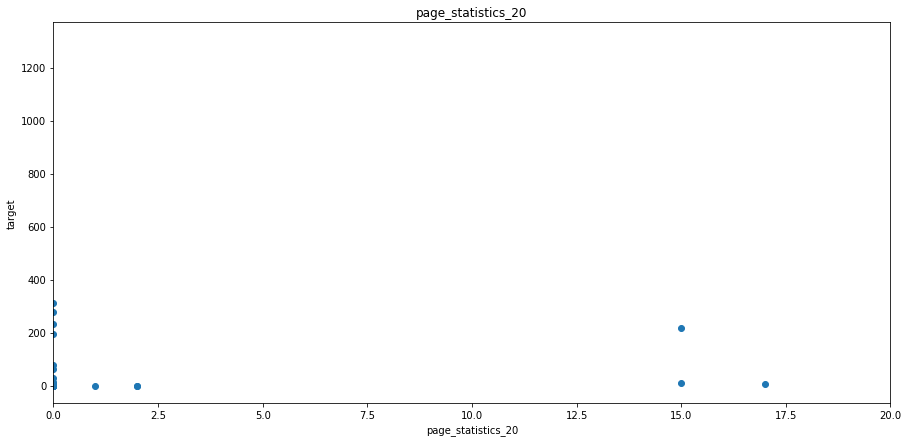

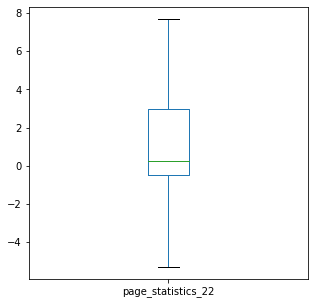

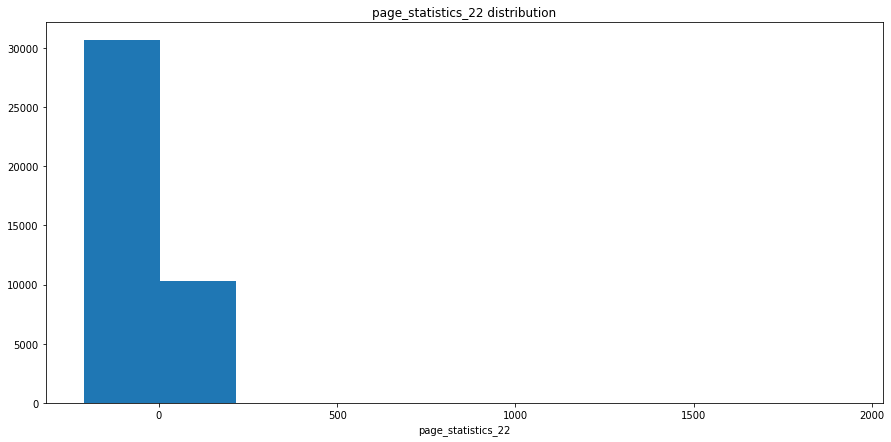

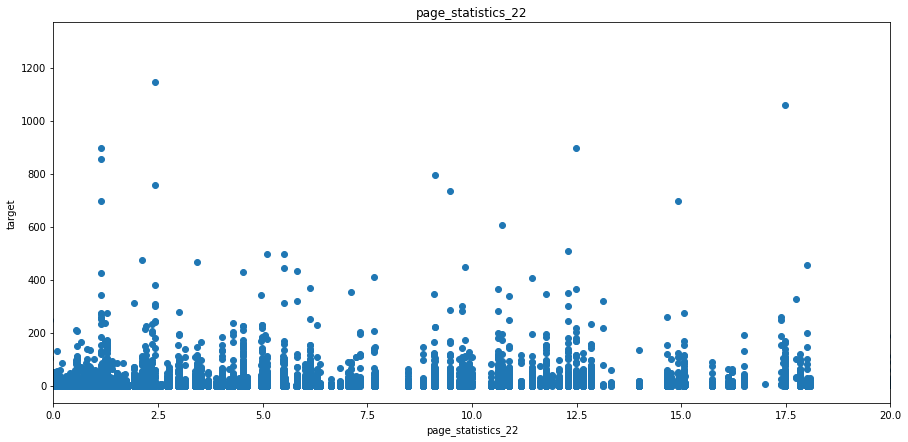

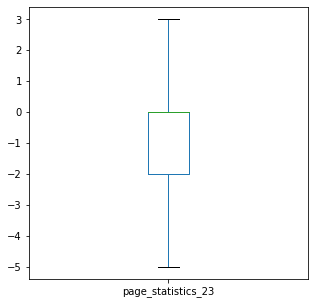

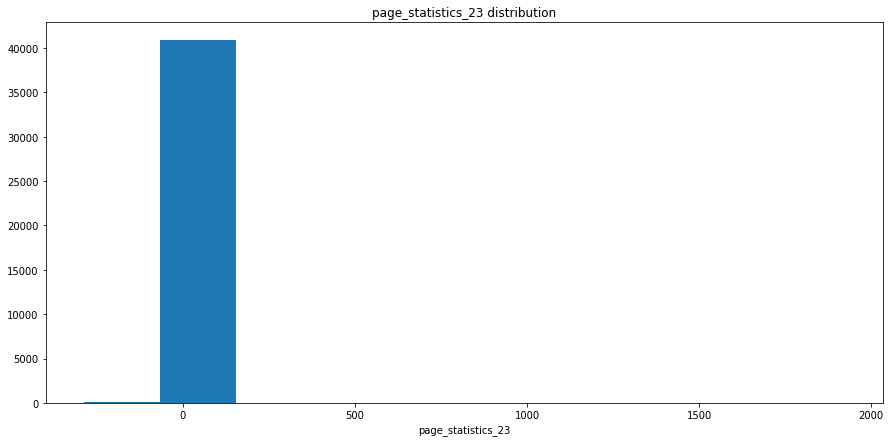

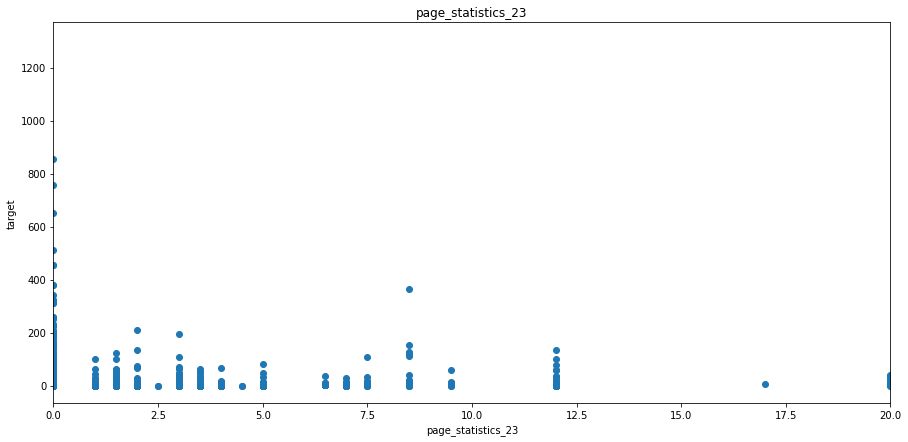

In [37]:
for name in names:
    plt.figure(figsize=(5,5))
    data.boxplot(column=name,showfliers=False, grid=False)
    plt.show()
    
    plt.figure(figsize=(15,7))
    plt.hist(x=data[name])
    plt.xlabel(name)
    plt.title(name+' distribution')
    plt.show()
    
    plt.figure(figsize=(15,7))
    plt.scatter(x=data[name], y=data['target'])
    plt.xlabel(name)
    plt.ylabel('target')
    plt.xlim(0,20)
    plt.title(name)
    plt.show()

In [38]:
nums_group_1=np.array([1,2,11], dtype=str)
names_group_1=['page_statistics_'+num for num in nums_group_1]

In [53]:
data[np.append(names_group_1, 'target')].corr()

,page_statistics_1,page_statistics_2,page_statistics_11,target
page_statistics_1,1.000000,0.706936,0.873700,0.231451
page_statistics_2,0.706936,1.000000,0.713092,0.334997
page_statistics_11,0.873700,0.713092,1.000000,0.229911
target,0.231451,0.334997,0.229911,1.000000


In [39]:
tmp_df=pd.DataFrame(np.sqrt(data[names_group_1]), columns=names_group_1)

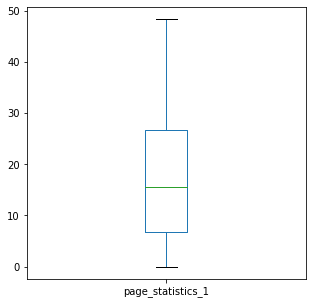

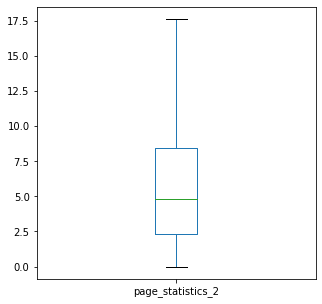

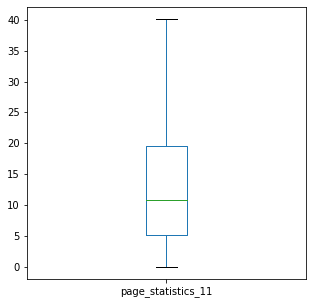

In [40]:
for name in names_group_1:
    plt.figure(figsize=(5,5))
    tmp_df.boxplot(column=name,showfliers=False, grid=False)
    plt.show()

In [41]:
# 20 и 22

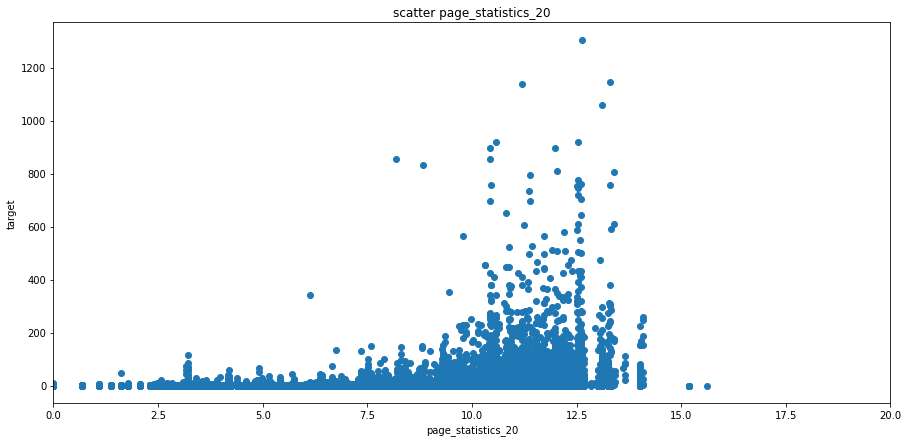

In [43]:
plt.figure(figsize=(15,7))
plt.scatter(x=tmp, y=data['target'])
plt.xlabel('page_statistics_20')
plt.ylabel('target')
plt.xlim(0,20)
plt.title('scatter page_statistics_20')
plt.show()

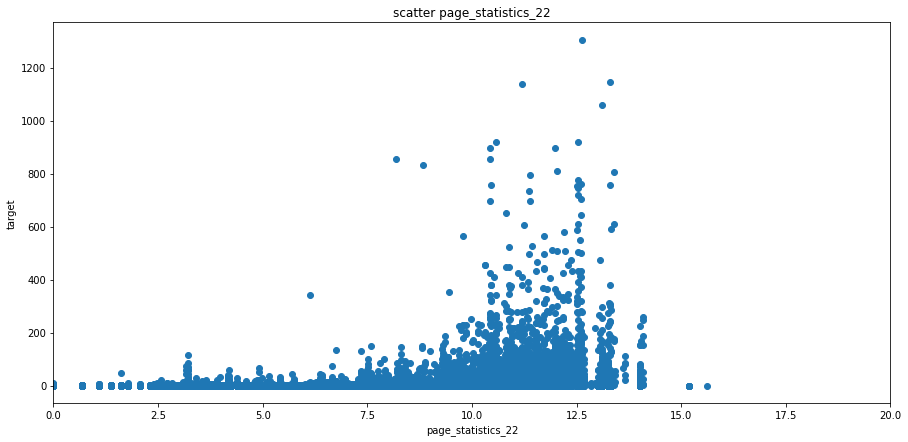

In [44]:
plt.figure(figsize=(15,7))
plt.scatter(x=tmp, y=data['target'])
plt.xlabel('page_statistics_22')
plt.ylabel('target')
plt.xlim(0,20)
plt.title('scatter page_statistics_22')
plt.show()

### comments_num* #30-34

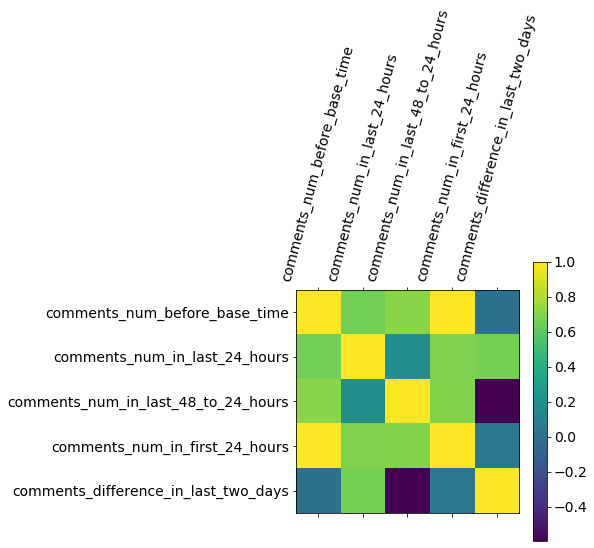

In [45]:
names=['comments_num_before_base_time',#30
                'comments_num_in_last_24_hours',#31 #last day
                'comments_num_in_last_48_to_24_hours',#32 #day before last
                'comments_num_in_first_24_hours',#33
                'comments_difference_in_last_two_days' ]

f2=plt.figure(figsize=(5, 5))

plt.matshow(data[names].corr(), fignum=f2.number)
plt.xticks(range(data[names].shape[1]), names, fontsize=14, rotation=75)
plt.yticks(range(data[names].shape[1]), names, fontsize=14)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [46]:
data[names].corr()

,comments_num_before_base_time,comments_num_in_last_24_hours,comments_num_in_last_48_to_24_hours,comments_num_in_first_24_hours,comments_difference_in_last_two_days
comments_num_before_base_time,1.000000,0.657502,0.713634,0.996736,-0.000152
comments_num_in_last_24_hours,0.657502,1.000000,0.193919,0.689487,0.672388
comments_num_in_last_48_to_24_hours,0.713634,0.193919,1.000000,0.699308,-0.595759
comments_num_in_first_24_hours,0.996736,0.689487,0.699308,1.000000,0.036844
comments_difference_in_last_two_days,-0.000152,0.672388,-0.595759,0.036844,1.000000


In [47]:
for name in names:
    print('Zero num in '+name)
    print(data.loc[data[name]==0].shape[0])

Zero num in comments_num_before_base_time
6691
Zero num in comments_num_in_last_24_hours
15016
Zero num in comments_num_in_last_48_to_24_hours
20921
Zero num in comments_num_in_first_24_hours
6908
Zero num in comments_difference_in_last_two_days
9473


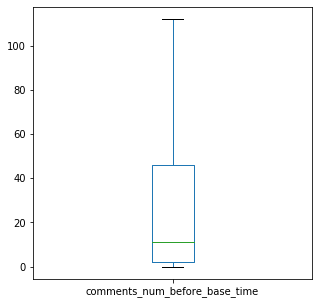

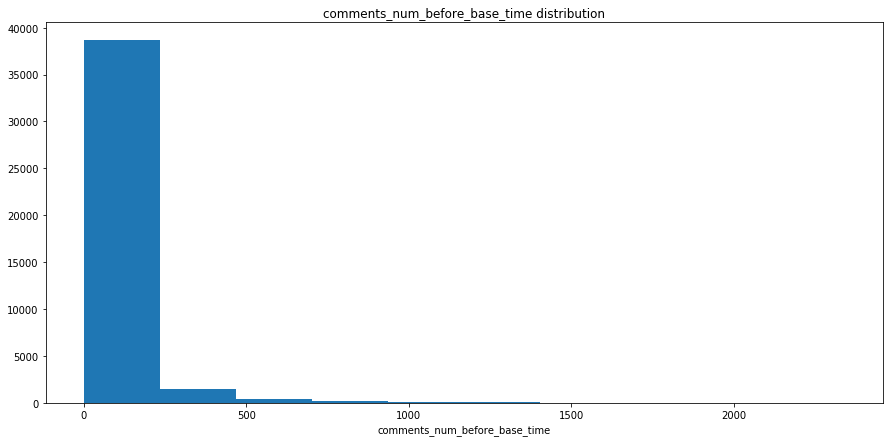

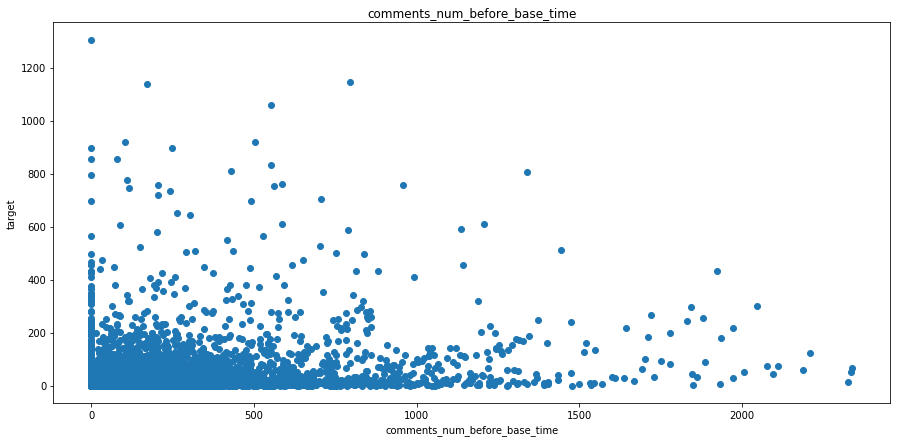

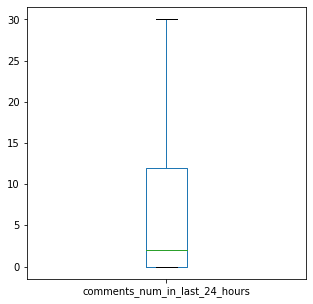

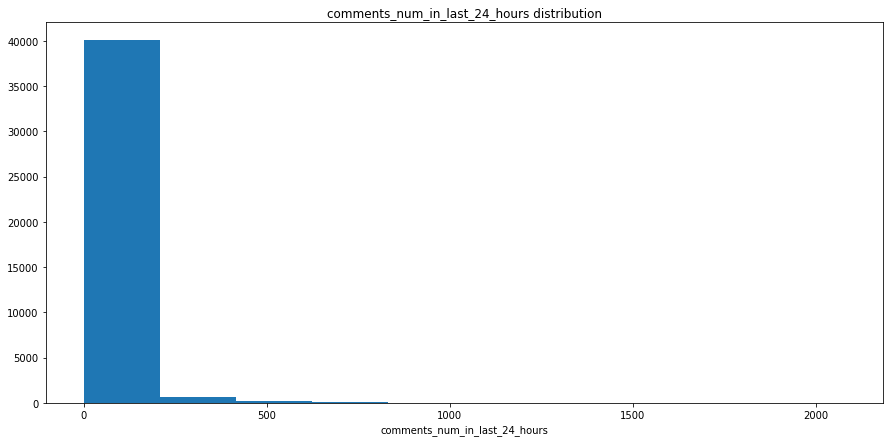

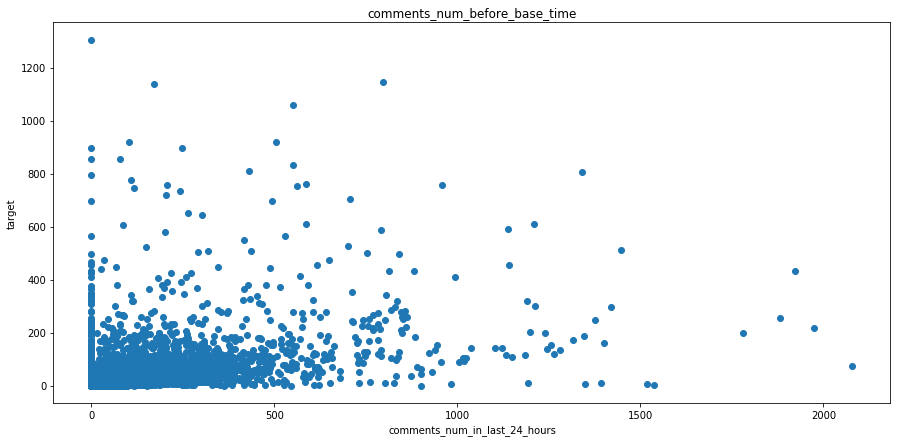

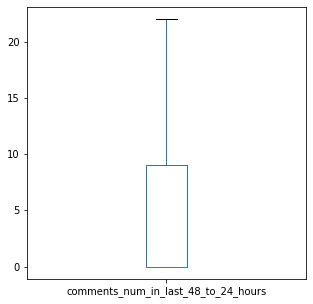

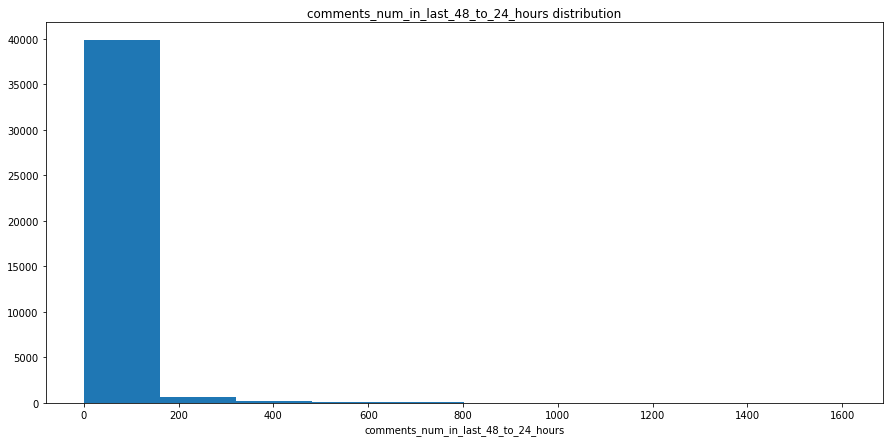

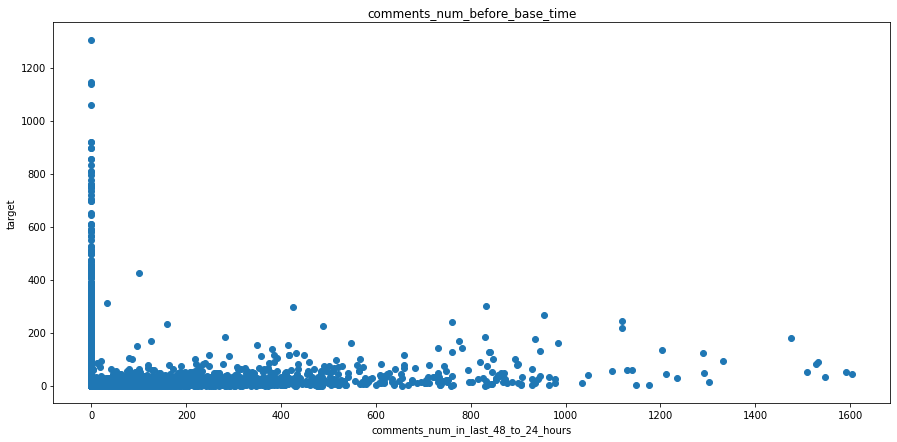

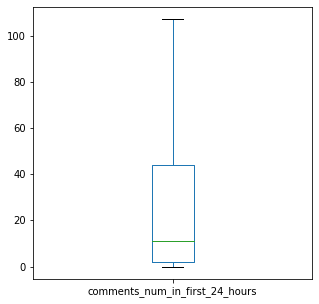

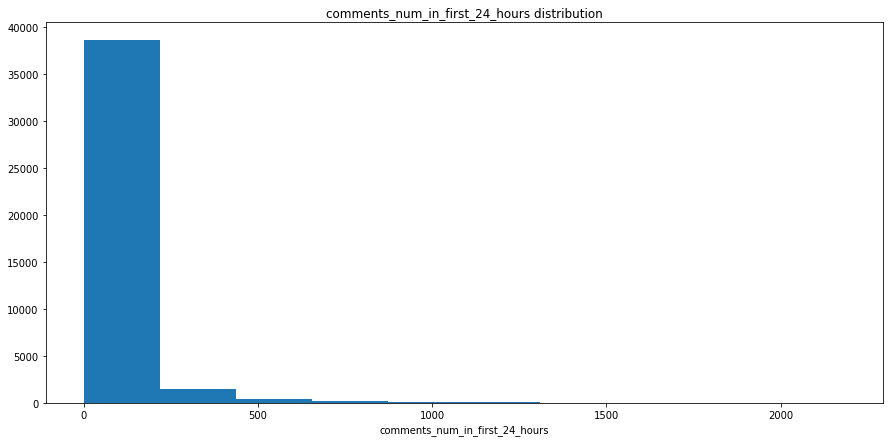

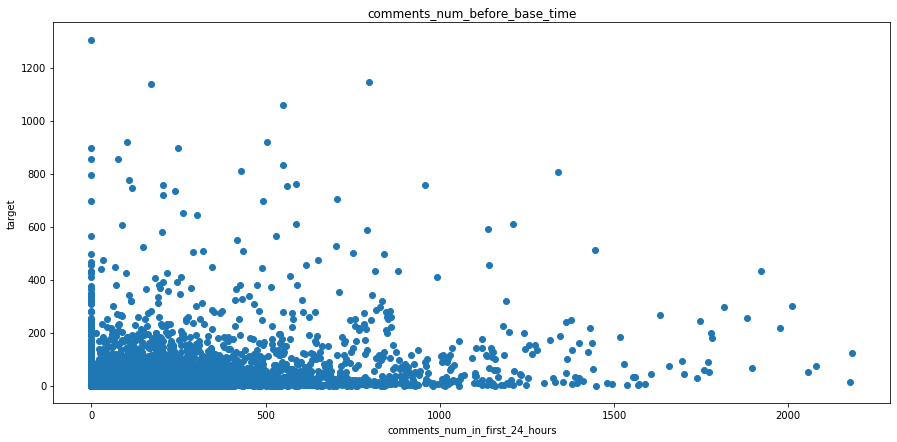

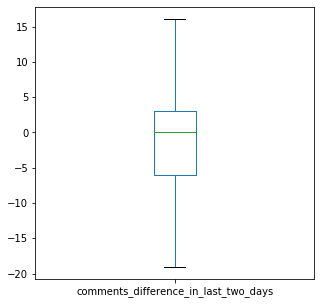

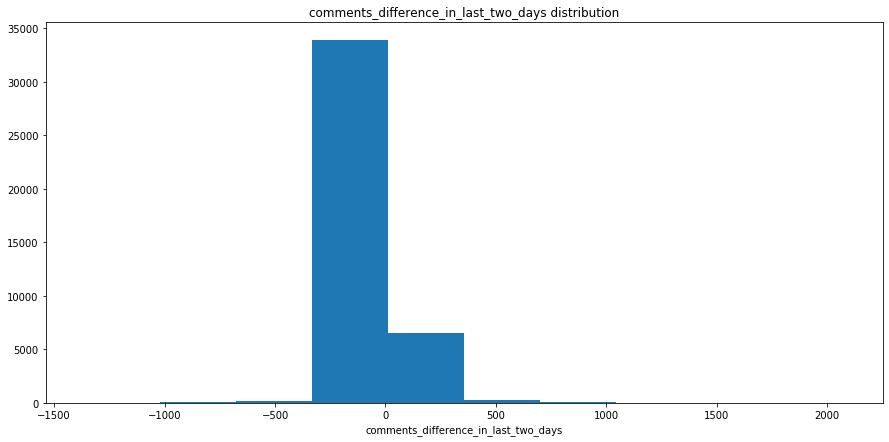

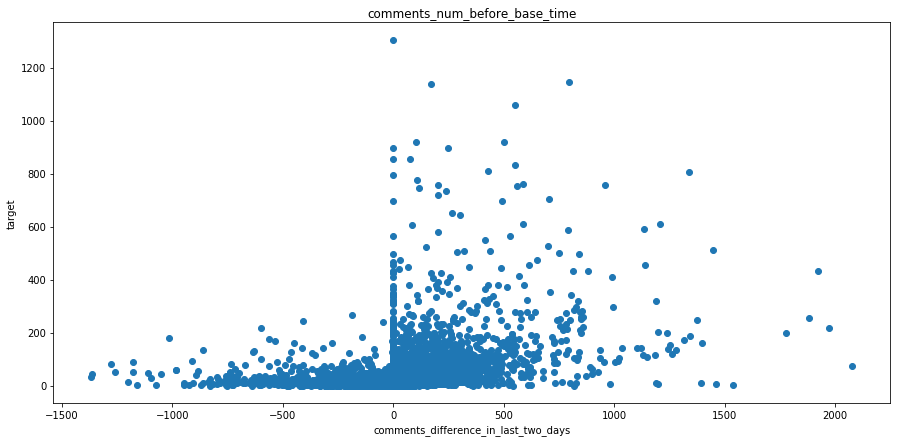

In [48]:
for name in names:
    plt.figure(figsize=(5,5))
    data.boxplot(column=name,showfliers=False, grid=False)
    plt.show()
    
    plt.figure(figsize=(15,7))
    plt.hist(x=data[name])
    plt.xlabel(name)
    plt.title(name+' distribution')
    plt.show()
    
    plt.figure(figsize=(15,7))
    plt.scatter(x=data[name], y=data['target'])
    plt.xlabel(name)
    plt.ylabel('target')
    plt.title(names[0])
    plt.show()

### character_num_in_post

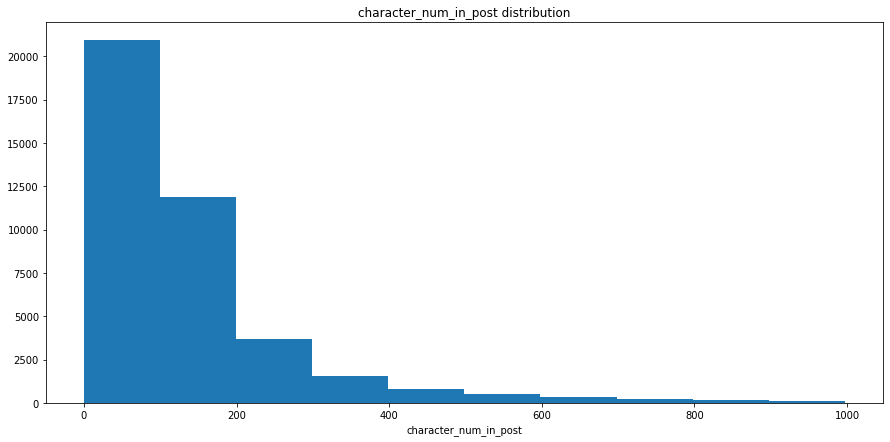

In [32]:
plt.figure(figsize=(15,7))
plt.hist(x=data['character_num_in_post'].loc[data['character_num_in_post']<1000])
plt.xlabel('character_num_in_post')

plt.title('character_num_in_post'+' distribution')
plt.show()

In [31]:
data.loc[data['character_num_in_post']==0].shape

(4579, 53)

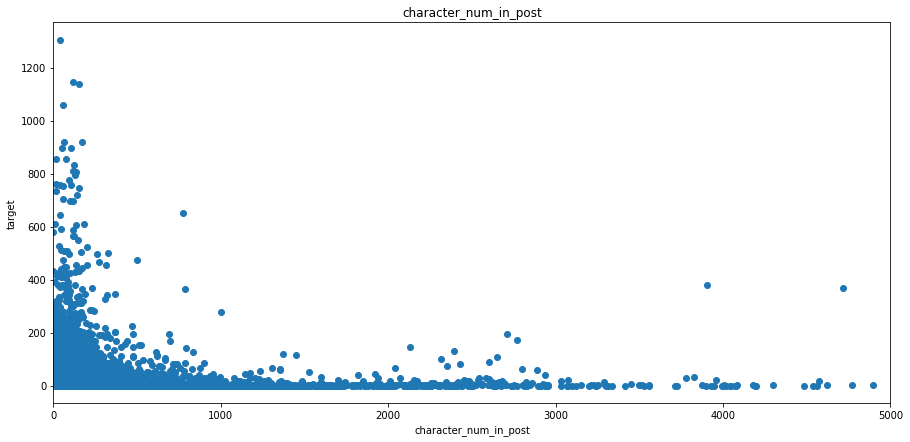

In [34]:
plt.figure(figsize=(15,7))
plt.scatter(x=data['character_num_in_post'], y=data['target'])
plt.xlabel('character_num_in_post')
plt.ylabel('target')
plt.xlim(0,5000)
plt.title('character_num_in_post')
plt.show()

###   'share_num' 

In [39]:
print(data.loc[data['share_num']==0].shape[0])
print(data.loc[data['share_num']==1].shape[0])

0
8815


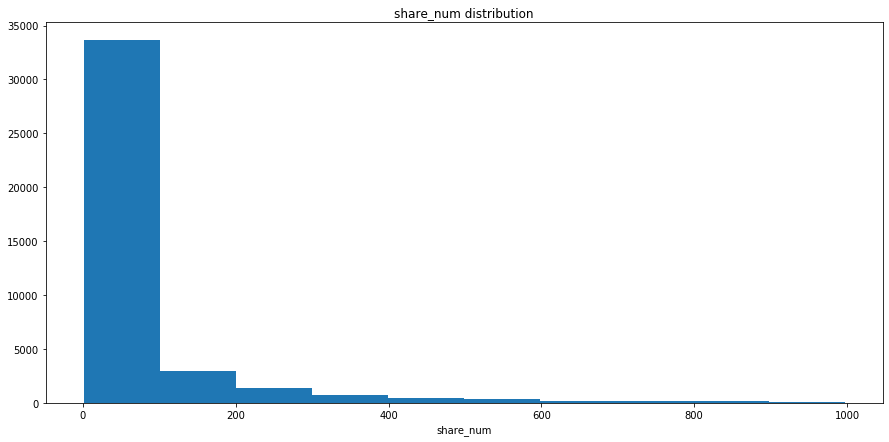

In [43]:
plt.figure(figsize=(15,7))
plt.hist(x=data['share_num'].loc[data['share_num']<1000])
plt.xlabel('share_num')

plt.title('share_num'+' distribution')
plt.show()

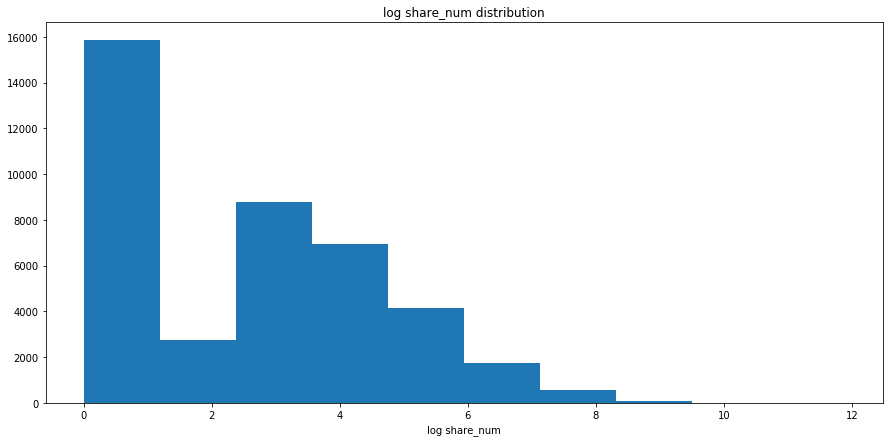

In [47]:
tmp=np.log(data['share_num'])

plt.figure(figsize=(15,7))
plt.hist(x=tmp)
plt.xlabel('log share_num')

plt.title('log share_num'+' distribution')
plt.show()

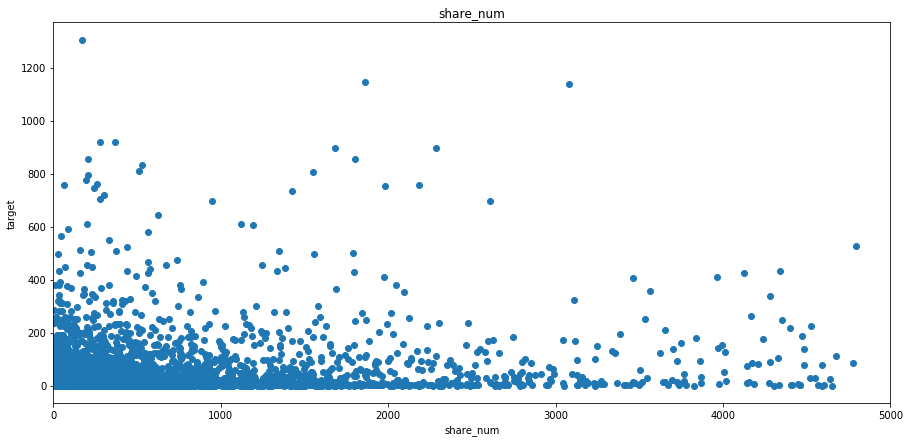

In [48]:
plt.figure(figsize=(15,7))
plt.scatter(x=data['share_num'], y=data['target'])
plt.xlabel('share_num')
plt.ylabel('target')
plt.xlim(0,5000)
plt.title('share_num')
plt.show()

## categories

### 'page_cat'

In [49]:
print('amount of categories:')
print(len(data['page_cat'].unique()))

amount of categories:
81


page_cat
93     1
83     1
58     2
63     4
62    16
Name: page_cat, dtype: int64
page_cat
16    1890
36    2387
18    4301
24    4511
9     7491
Name: page_cat, dtype: int64


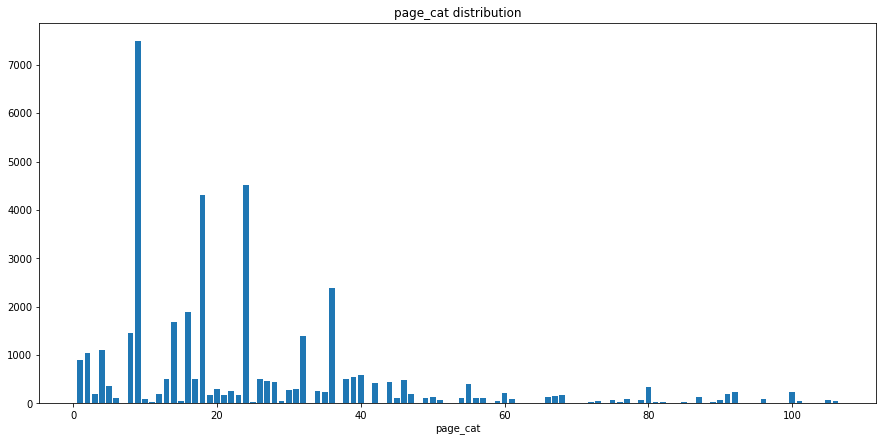

In [50]:
plt.figure(figsize=(15,7))
tmp=data.groupby(by=['page_cat'])['page_cat'].count()
print(tmp.sort_values().head())
print(tmp.sort_values().tail())
plt.bar(list(tmp.index),tmp.values)
plt.xlabel('page_cat')
plt.title('page_cat distribution')
plt.show()

### 'base_time' 

In [12]:
y=data['base_time'].unique()
y.sort()
print(y)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]


base_time
62    489
61    496
71    503
58    512
5     513
Name: base_time, dtype: int64
base_time
29    614
31    615
6     617
15    622
42    625
Name: base_time, dtype: int64


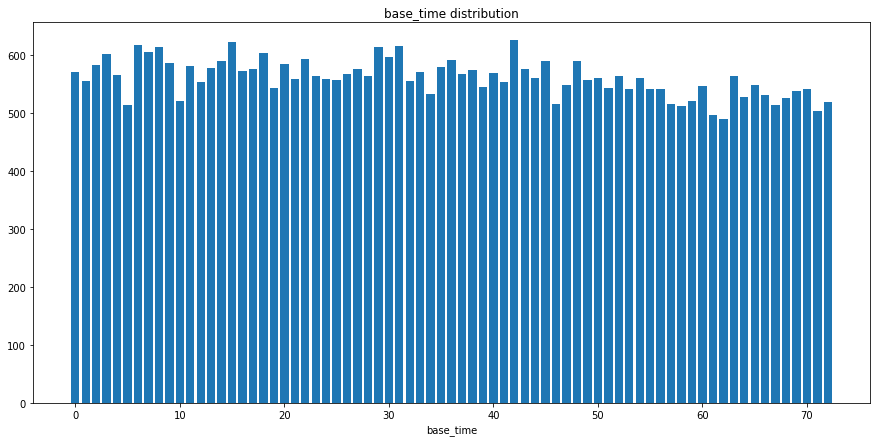

In [13]:
plt.figure(figsize=(15,7))
tmp=data.groupby(by=['base_time'])['base_time'].count()
print(tmp.sort_values().head())
print(tmp.sort_values().tail())
plt.bar(list(tmp.index),tmp.values)
plt.xlabel('base_time')
plt.title('base_time distribution')
plt.show()

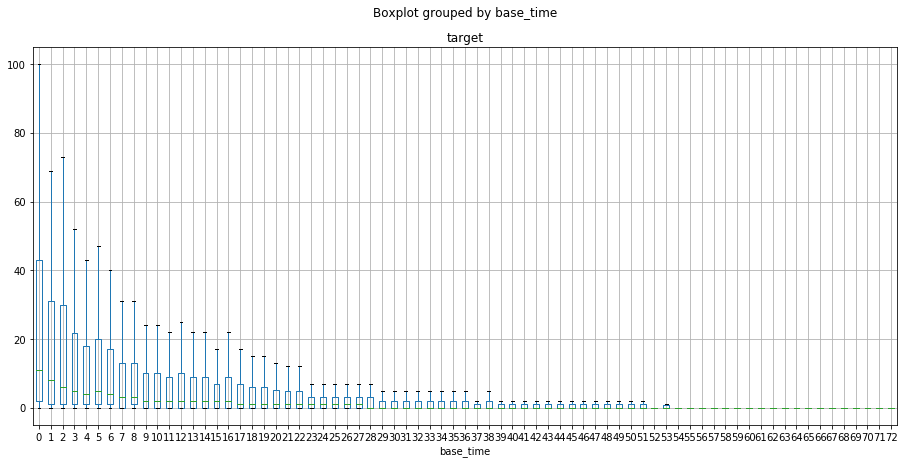

In [22]:
data.boxplot(column='target', by='base_time', showfliers=False, figsize=(15,7))

### h_local 

In [51]:
y=data['h_local'].unique()
y.sort()
print(y)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


h_local
7     24
8     27
13    28
18    29
5     29
Name: h_local, dtype: int64
h_local
3        40
19       40
2        43
1        49
24    40163
Name: h_local, dtype: int64


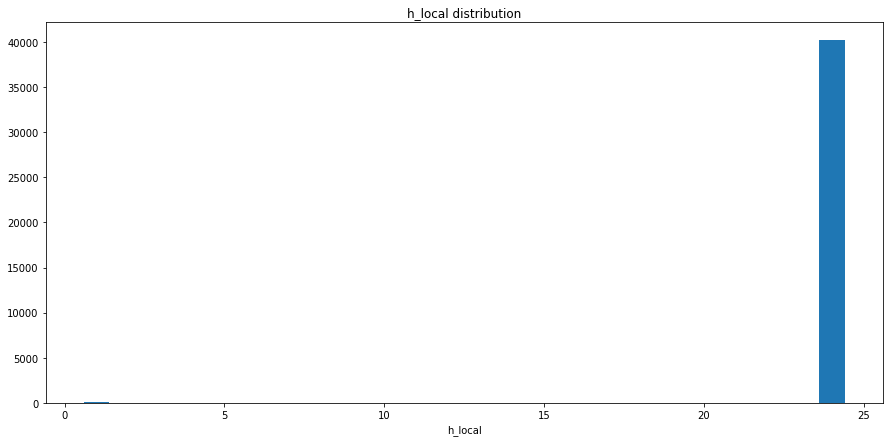

In [52]:
plt.figure(figsize=(15,7))
tmp=data.groupby(by=['h_local'])['h_local'].count()
print(tmp.sort_values().head())
print(tmp.sort_values().tail())
plt.bar(list(tmp.index),tmp.values)
plt.xlabel('h_local')
plt.title('h_local distribution')
plt.show()

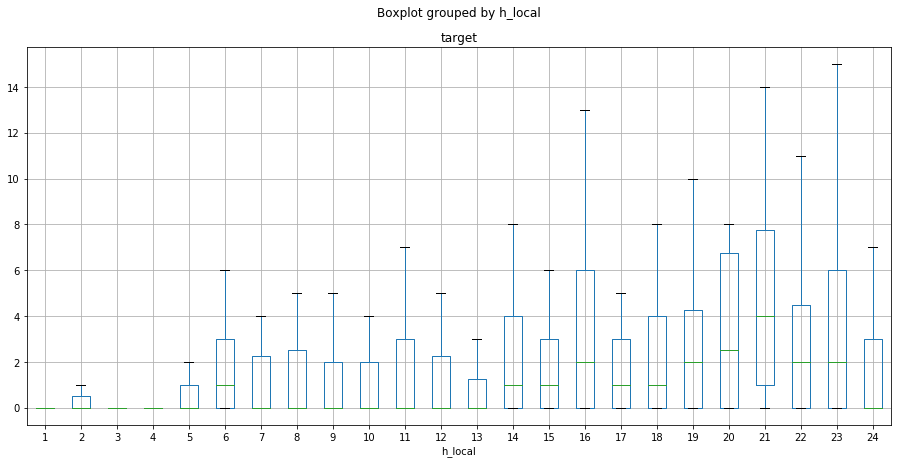

In [54]:
data.boxplot(column='target', by='h_local', showfliers=False, figsize=(15,7))

###  'post_published_weekday', #40-46 This represents the day(Sunday...Saturday) on which the post was published. 

In [38]:
names=data.columns[data.columns.astype(str).str.contains('post_published_weekday')==True]

In [7]:
tmp_df=data[names]

In [8]:
print(tmp_df.sum(axis=0))

post_published_weekday_sunday       5008
post_published_weekday_monday       5868
post_published_weekday_tuesday      6131
post_published_weekday_wednesday    6448
post_published_weekday_thursday     5896
post_published_weekday_friday       5983
post_published_weekday_saturday     5607
dtype: int64


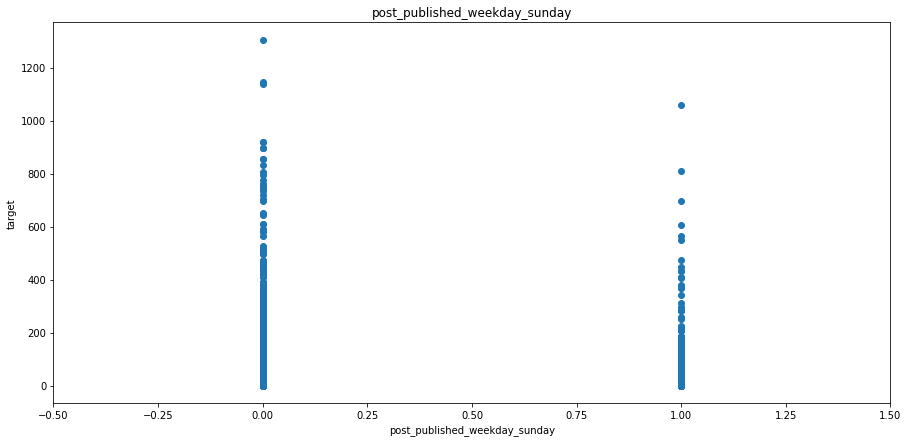

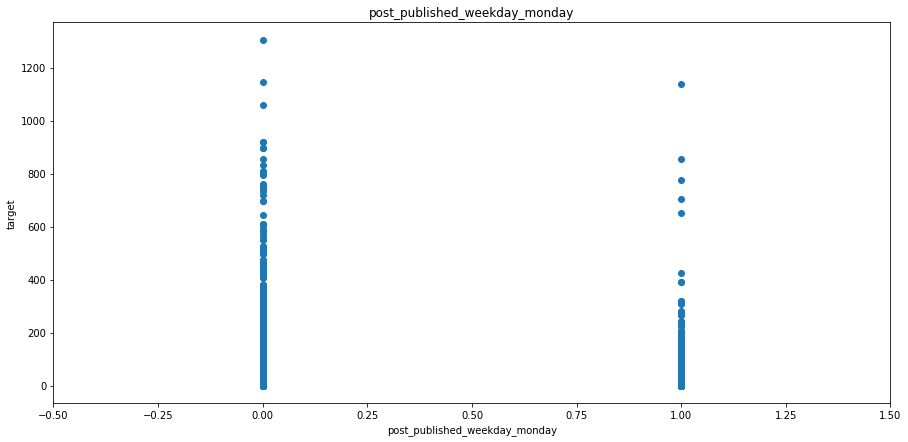

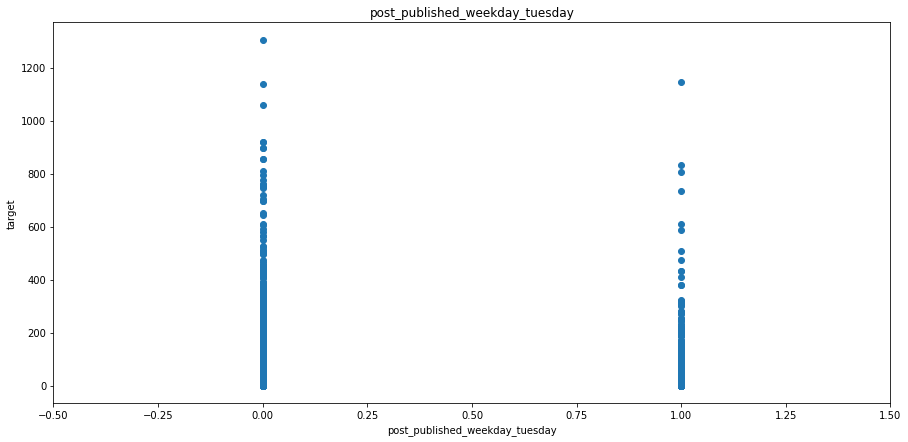

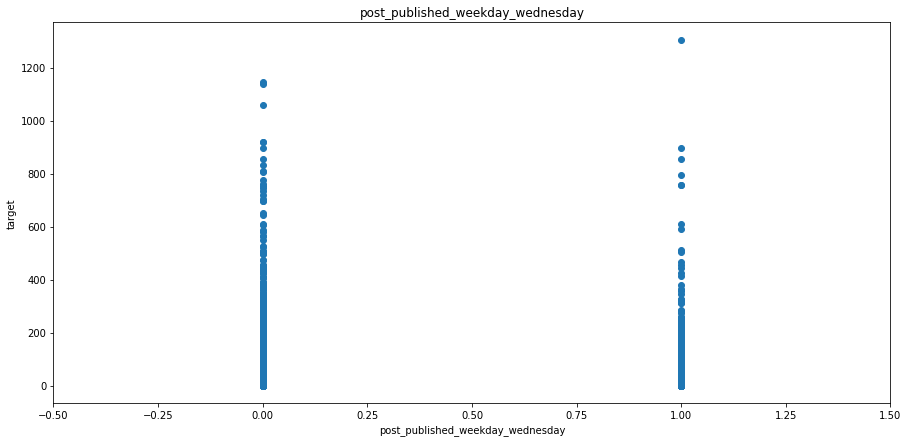

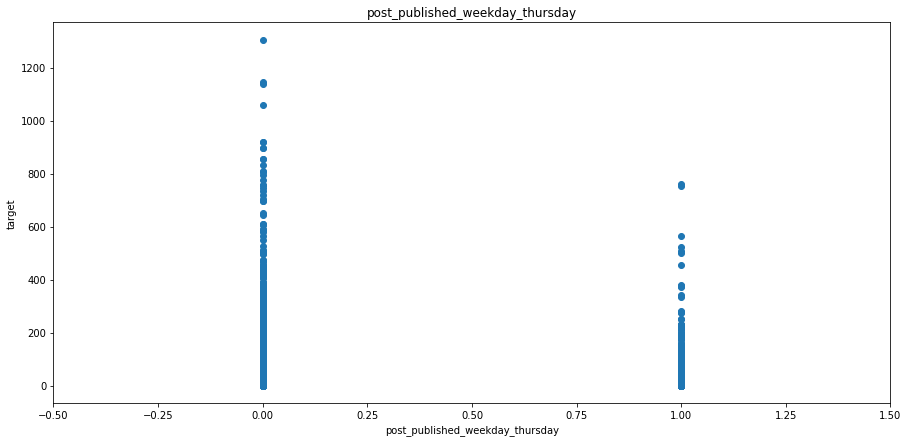

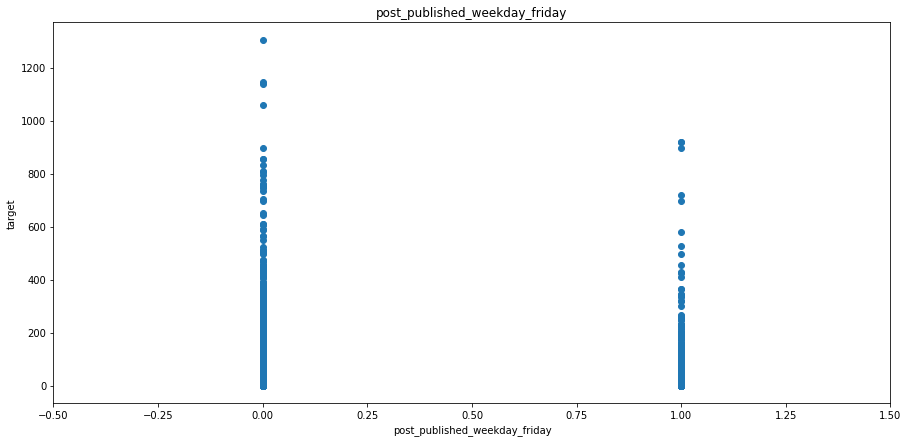

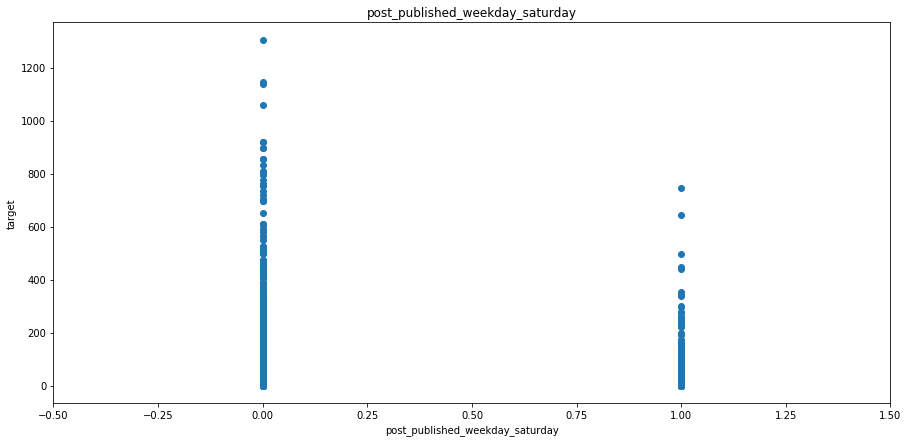

In [27]:
for name in names:    
    #data.boxplot(column='target', by=name, showfliers=False, figsize=(15,7))
    
    plt.figure(figsize=(15,7))
    plt.scatter(x=data[name], y=data['target'])
    plt.xlabel(name)
    plt.ylabel('target')
    plt.xlim(-0.5,1.5)
    plt.title(name)
    plt.show()

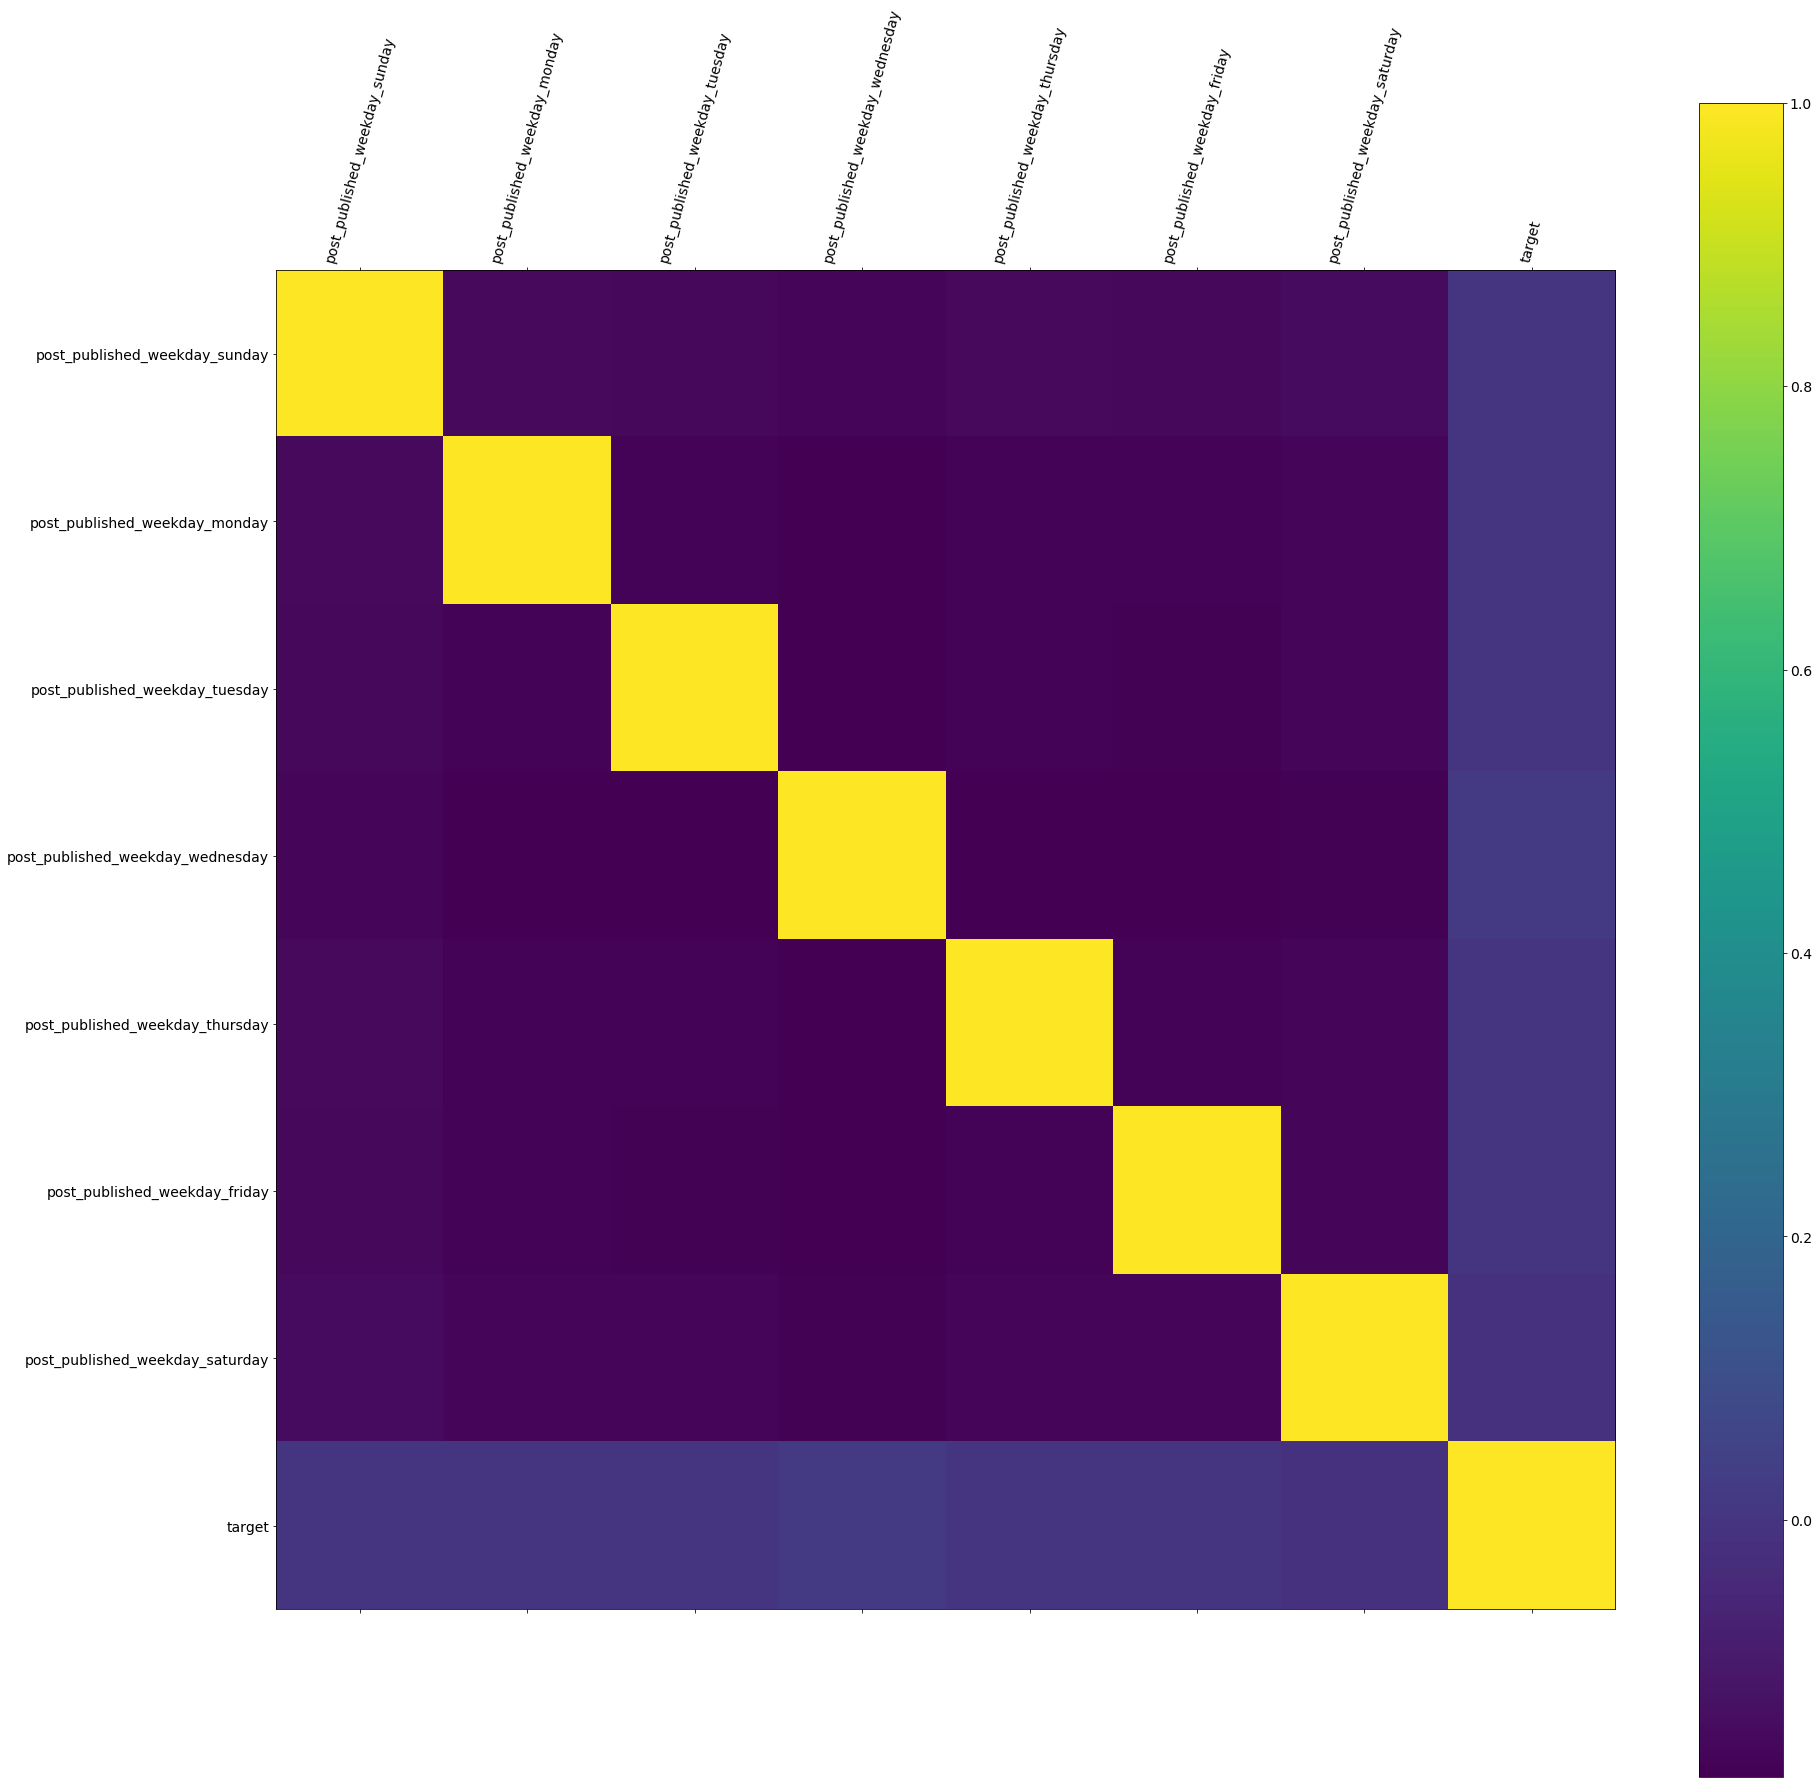

In [39]:
f=plt.figure(figsize=(30, 30))
names=np.append(names,'target')
plt.matshow(data[names].corr(), fignum=f.number)
plt.xticks(range(data[names].shape[1]), names, fontsize=14, rotation=75)
plt.yticks(range(data[names].shape[1]), names, fontsize=14)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [40]:
data[names].corr()

,post_published_weekday_sunday,post_published_weekday_monday,post_published_weekday_tuesday,post_published_weekday_wednesday,post_published_weekday_thursday,post_published_weekday_friday,post_published_weekday_saturday,target
post_published_weekday_sunday,1.000000,-0.152702,-0.156675,-0.161411,-0.153127,-0.154444,-0.148715,0.001444
post_published_weekday_monday,-0.152702,1.000000,-0.171661,-0.176850,-0.167774,-0.169217,-0.162940,-0.003083
post_published_weekday_tuesday,-0.156675,-0.171661,1.000000,-0.181452,-0.172139,-0.173620,-0.167179,0.001264
post_published_weekday_wednesday,-0.161411,-0.176850,-0.181452,1.000000,-0.177342,-0.178868,-0.172233,0.021171
post_published_weekday_thursday,-0.153127,-0.167774,-0.172139,-0.177342,1.000000,-0.169688,-0.163393,-0.004473
post_published_weekday_friday,-0.154444,-0.169217,-0.173620,-0.178868,-0.169688,1.000000,-0.164799,-0.005029
post_published_weekday_saturday,-0.148715,-0.162940,-0.167179,-0.172233,-0.163393,-0.164799,1.000000,-0.012242
target,0.001444,-0.003083,0.001264,0.021171,-0.004473,-0.005029,-0.012242,1.000000


### 'base_ditetime_weekday', #47-53 This represents the day(Sunday...Saturday) on selected base Date/Time.  

In [33]:
names=data.columns[data.columns.astype(str).str.contains('base_ditetime_weekday')==True]

In [34]:
tmp_df=data[names]
print(tmp_df.sum(axis=0))

base_ditetime_weekday_sunday       5798
base_ditetime_weekday_monday       5425
base_ditetime_weekday_tuesday      5635
base_ditetime_weekday_wednesday    6085
base_ditetime_weekday_thursday     6176
base_ditetime_weekday_friday       5889
base_ditetime_weekday_saturday     5933
dtype: int64


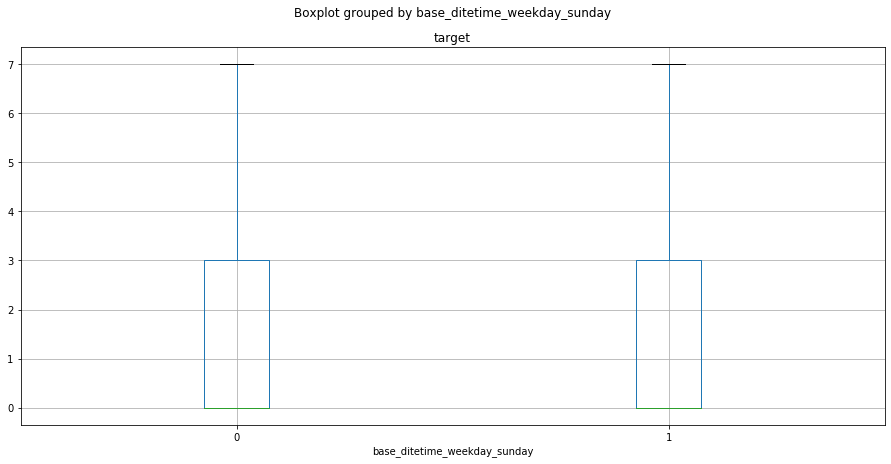

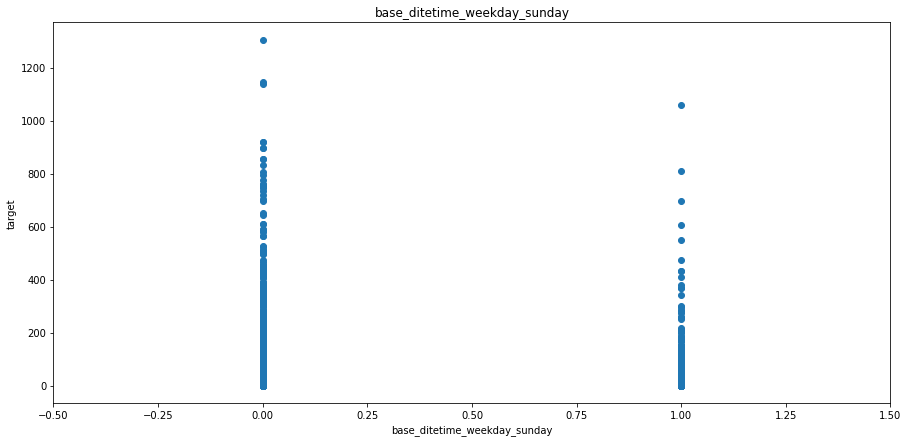

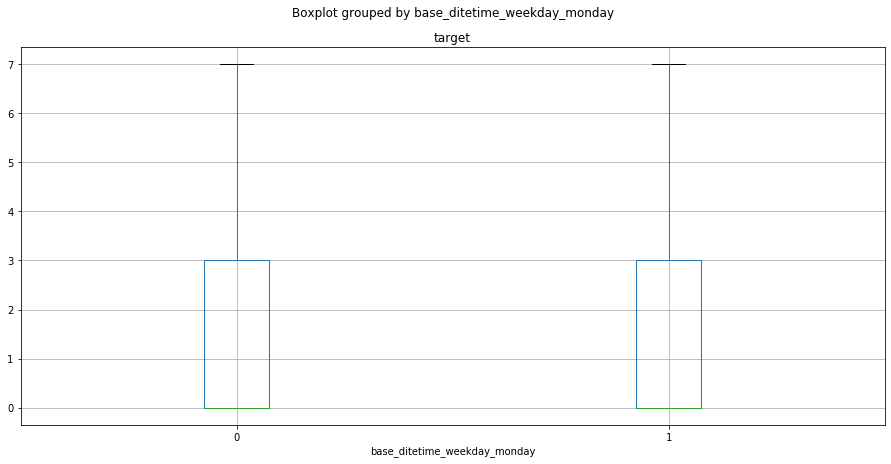

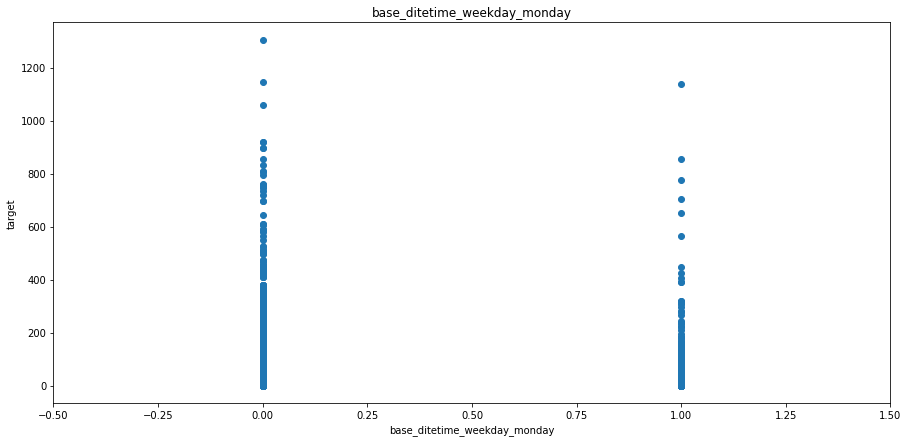

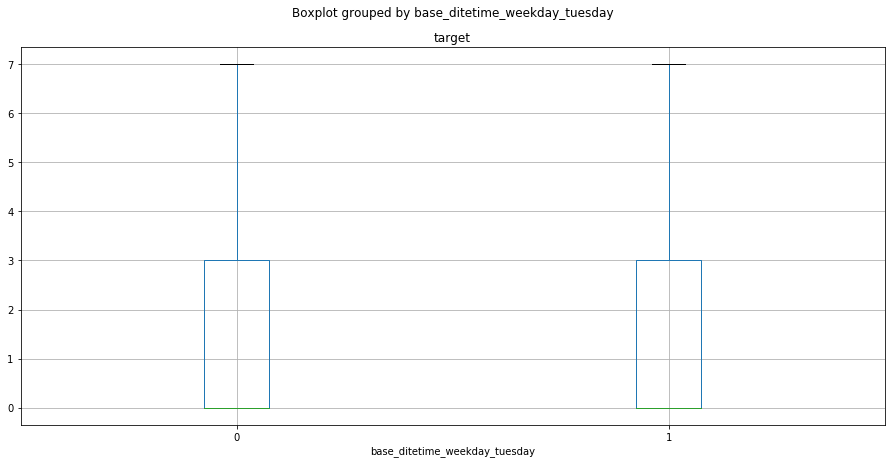

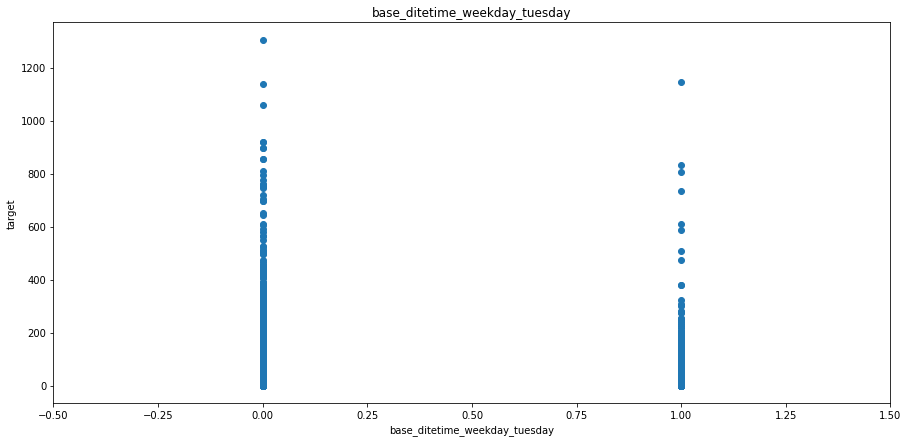

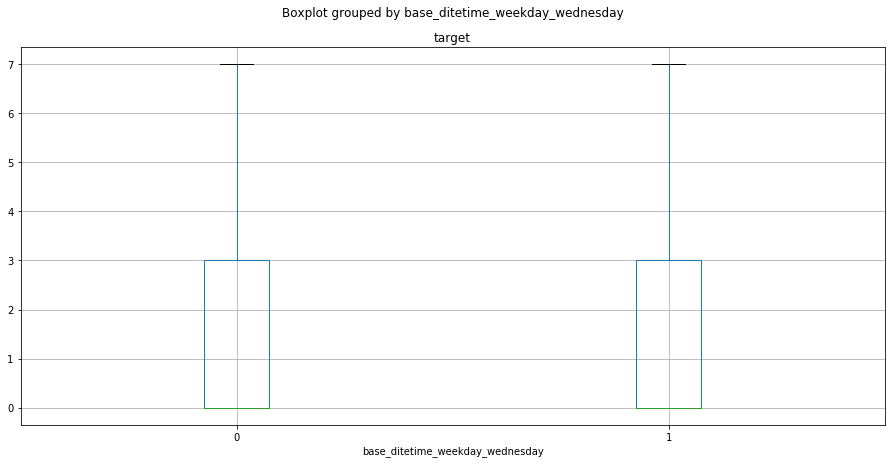

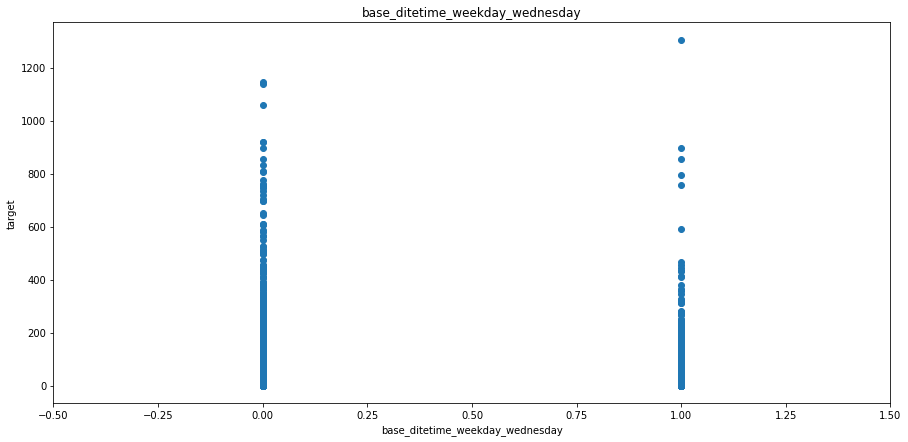

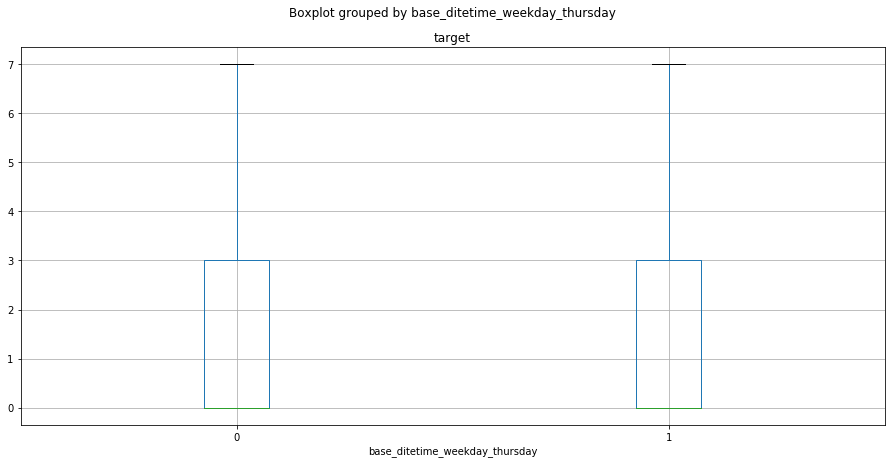

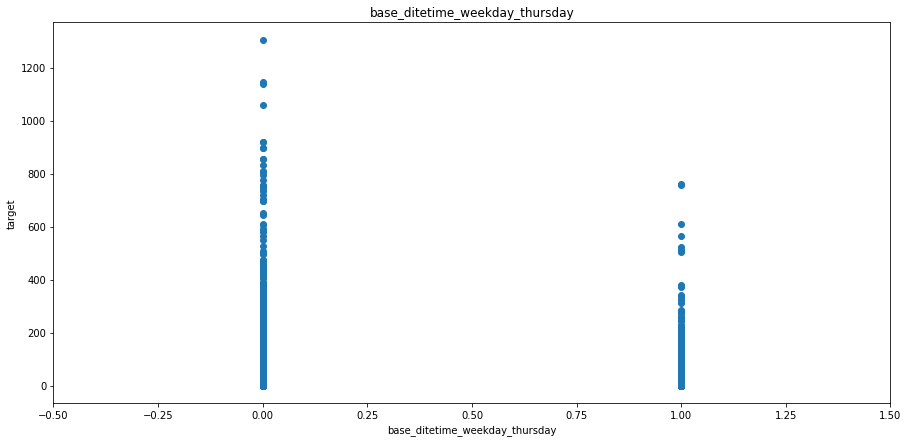

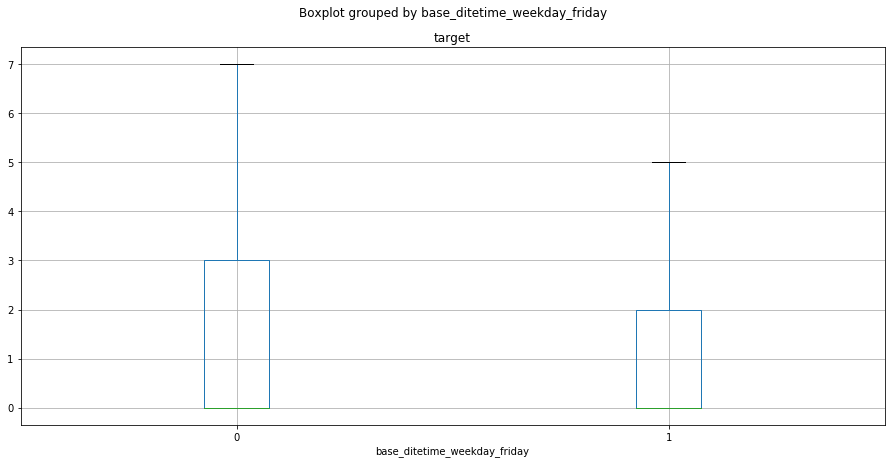

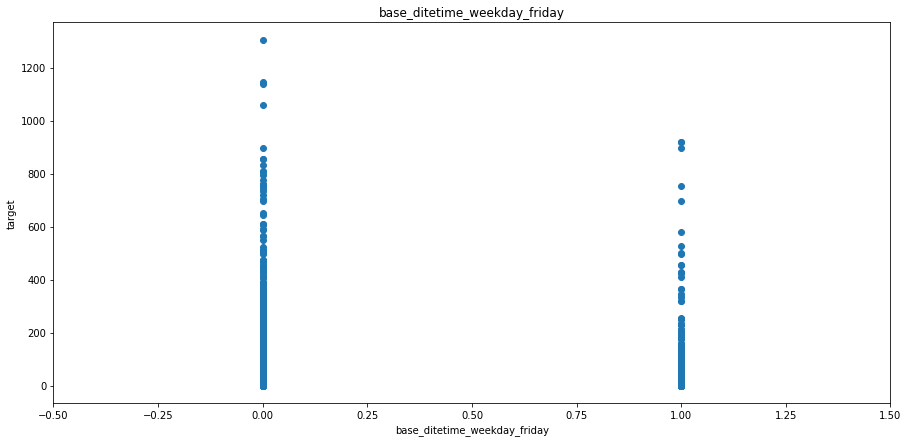

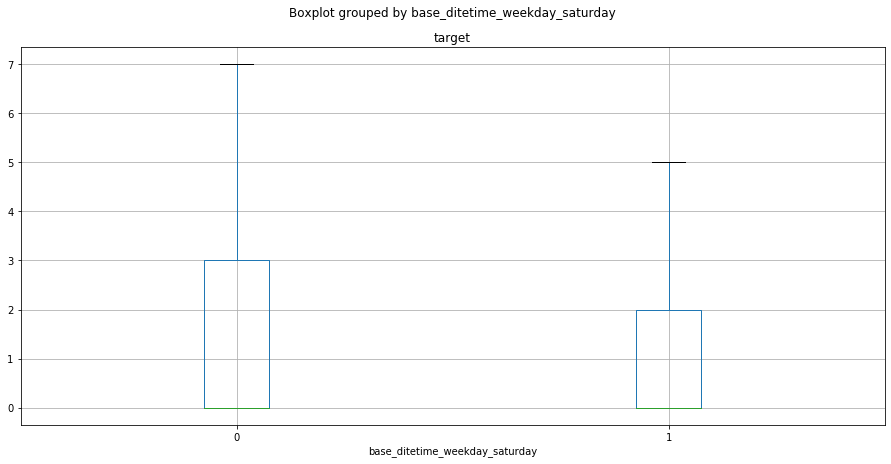

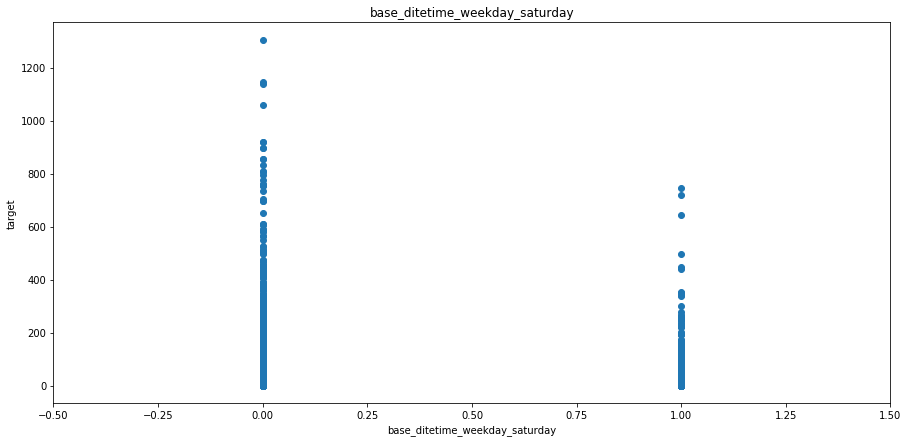

In [35]:
for name in names:    
    data.boxplot(column='target', by=name, showfliers=False, figsize=(15,7))
    
    plt.figure(figsize=(15,7))
    plt.scatter(x=data[name], y=data['target'])
    plt.xlabel(name)
    plt.ylabel('target')
    plt.xlim(-0.5,1.5)
    plt.title(name)
    plt.show()

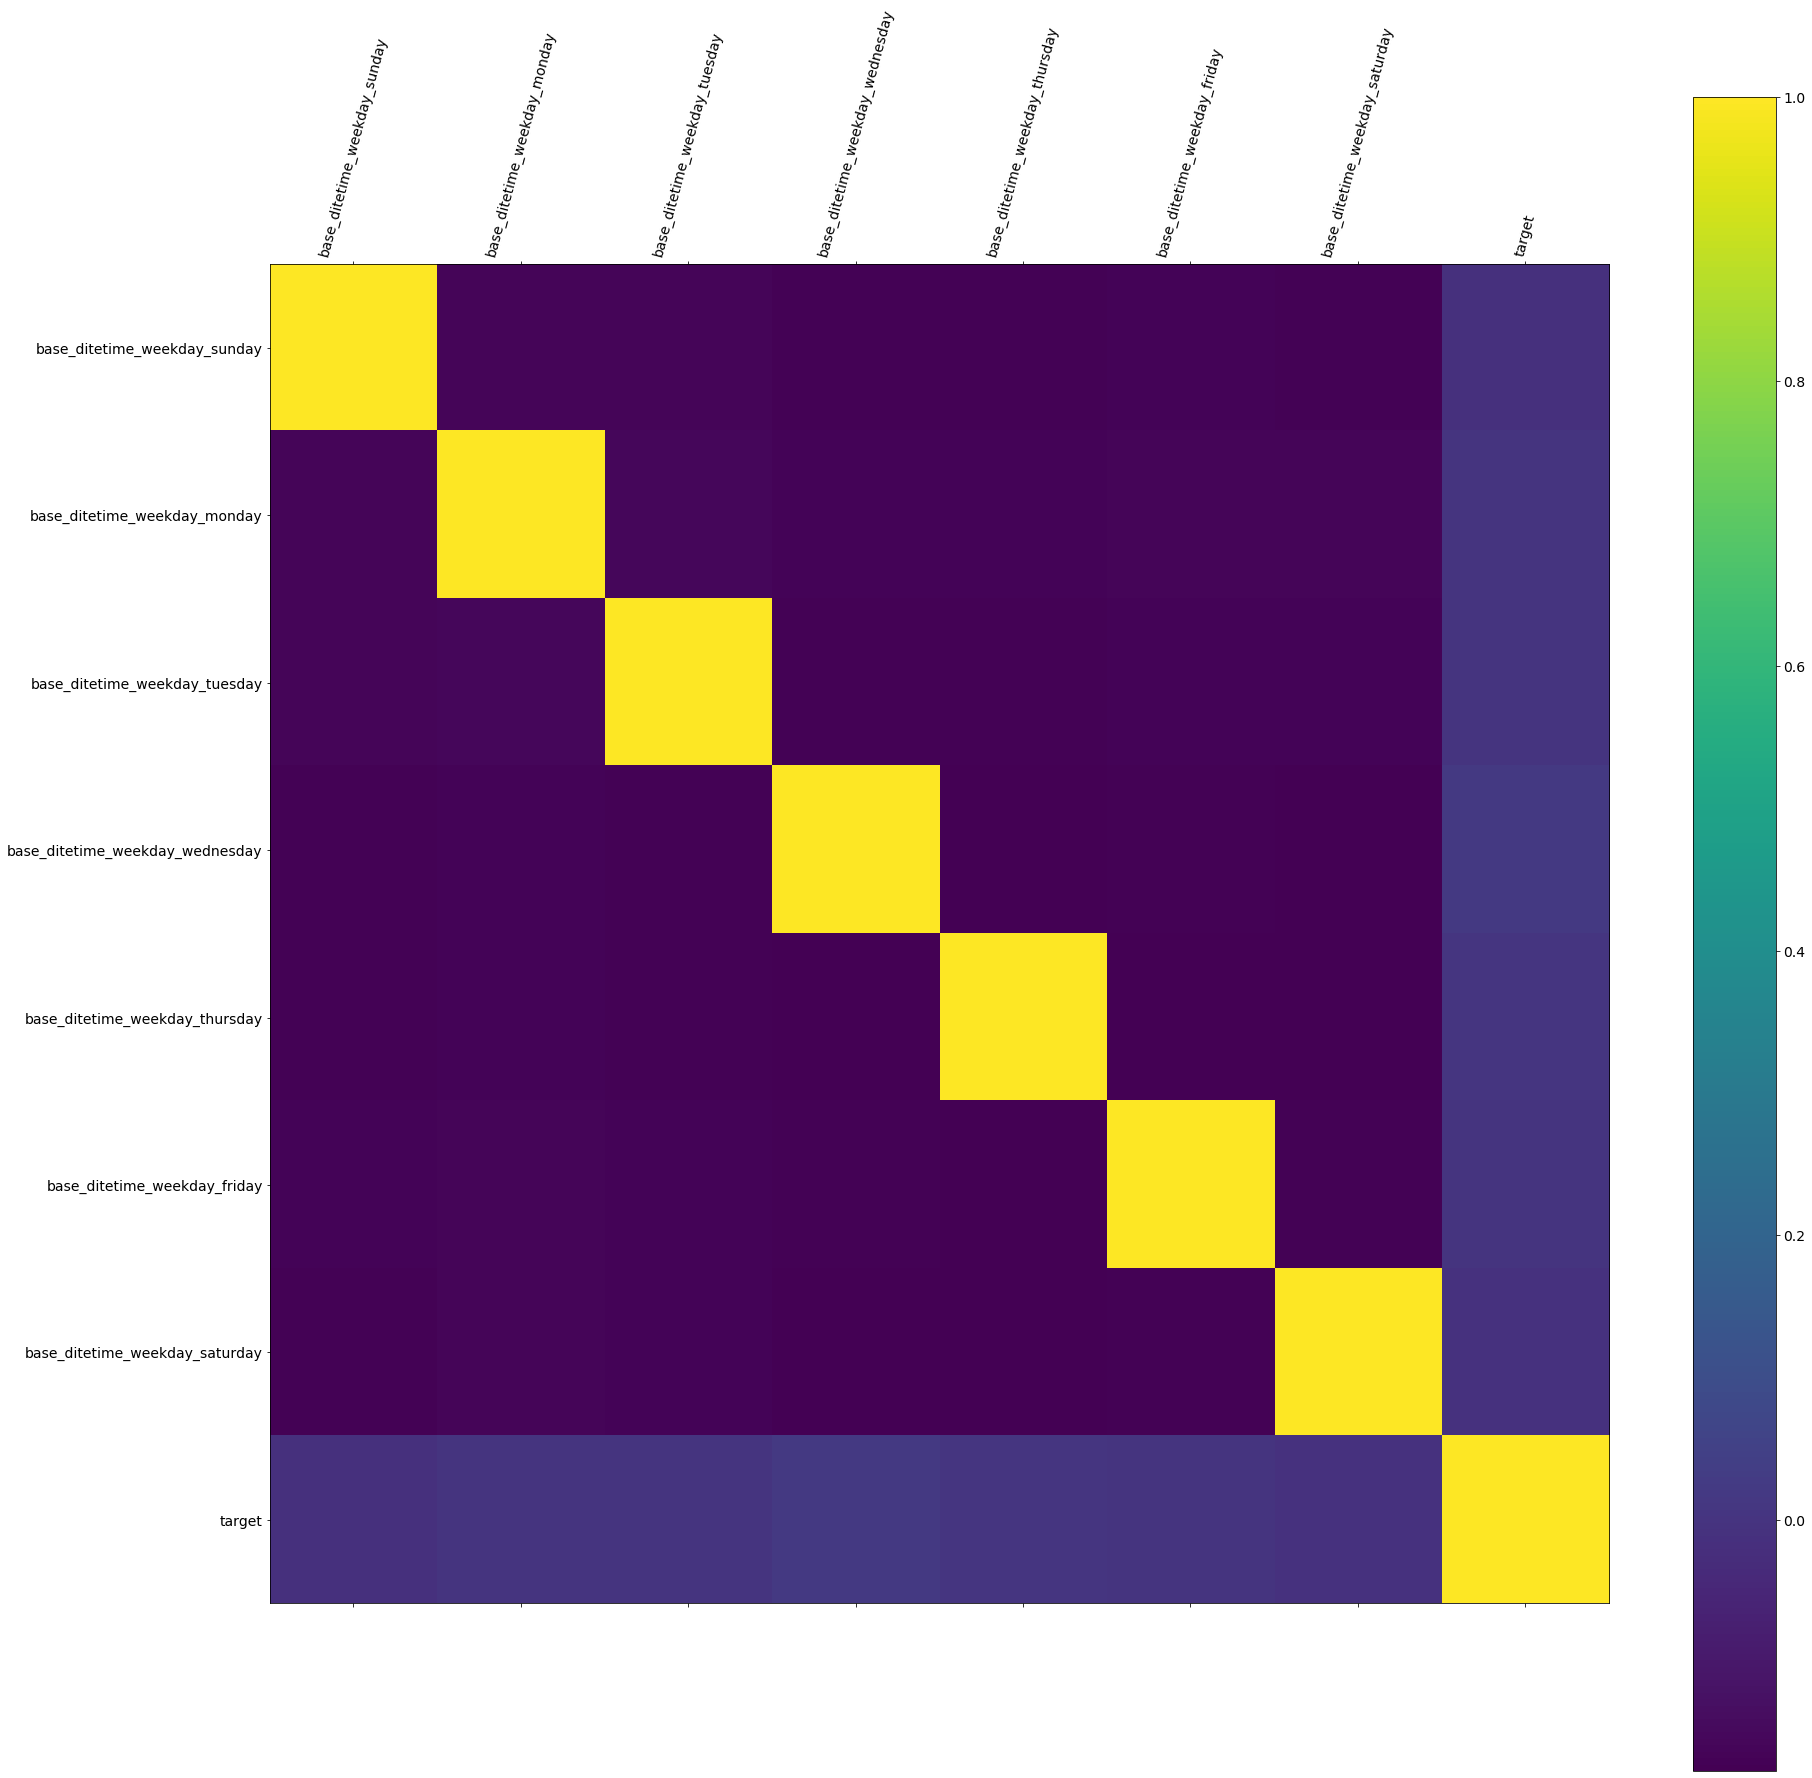

In [36]:
f=plt.figure(figsize=(30, 30))
names=np.append(names,'target')
plt.matshow(data[names].corr(), fignum=f.number)
plt.xticks(range(data[names].shape[1]), names, fontsize=14, rotation=75)
plt.yticks(range(data[names].shape[1]), names, fontsize=14)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [37]:
data[names].corr()

,base_ditetime_weekday_sunday,base_ditetime_weekday_monday,base_ditetime_weekday_tuesday,base_ditetime_weekday_wednesday,base_ditetime_weekday_thursday,base_ditetime_weekday_friday,base_ditetime_weekday_saturday,target
base_ditetime_weekday_sunday,1.000000,-0.158748,-0.162272,-0.169711,-0.171199,-0.166488,-0.167214,-0.012434
base_ditetime_weekday_monday,-0.158748,1.000000,-0.156139,-0.163297,-0.164729,-0.160196,-0.160895,-0.000288
base_ditetime_weekday_tuesday,-0.162272,-0.156139,1.000000,-0.166922,-0.168386,-0.163752,-0.164466,-0.000129
base_ditetime_weekday_wednesday,-0.169711,-0.163297,-0.166922,1.000000,-0.176106,-0.171260,-0.172007,0.017286
base_ditetime_weekday_thursday,-0.171199,-0.164729,-0.168386,-0.176106,1.000000,-0.172761,-0.173515,0.007106
base_ditetime_weekday_friday,-0.166488,-0.160196,-0.163752,-0.171260,-0.172761,1.000000,-0.168740,-0.001353
base_ditetime_weekday_saturday,-0.167214,-0.160895,-0.164466,-0.172007,-0.173515,-0.168740,1.000000,-0.010624
target,-0.012434,-0.000288,-0.000129,0.017286,0.007106,-0.001353,-0.010624,1.000000


# ALL

## Target

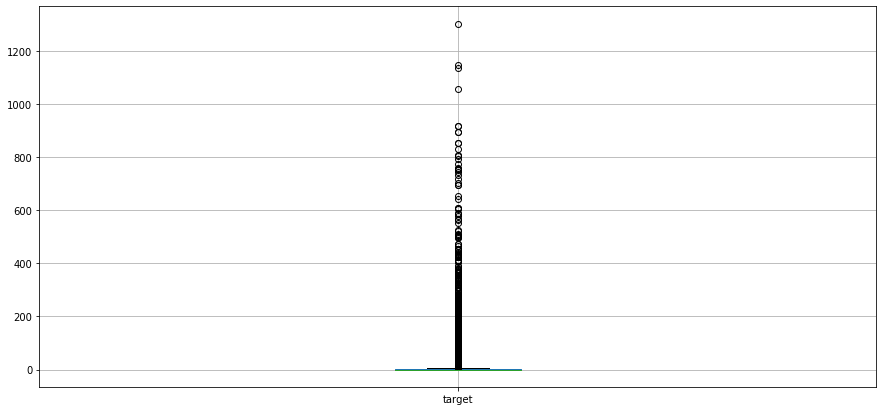

In [43]:
data.boxplot(column='target', showfliers=True, figsize=(15,7))

In [48]:
data.loc[data['target']==0].shape[0]

22573

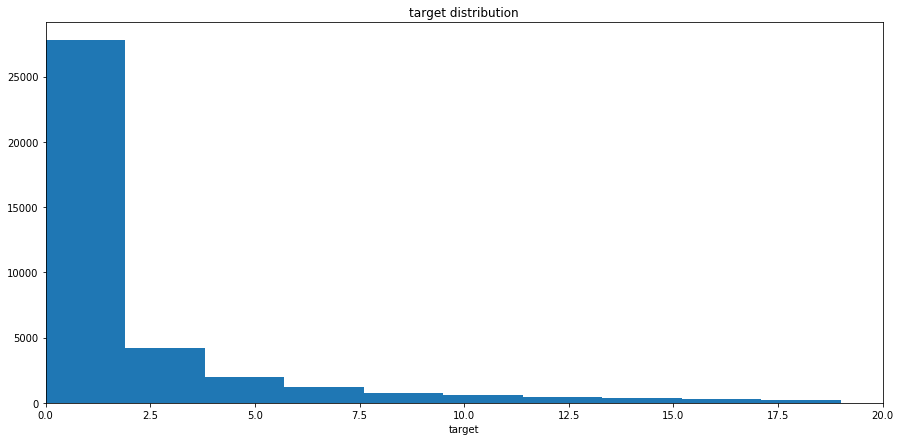

In [51]:
plt.figure(figsize=(15,7))
plt.hist(x=data.loc[data['target']<20, 'target'])
plt.xlabel('target')
plt.xlim(0,20)
plt.title('target distribution')
plt.show()

In [ ]:
tmp=np.sqrt(data.loc[data['target']])

plt.figure(figsize=(15,7))
plt.hist(x=tmp)
plt.xlabel('target')
#plt.xlim(0,20)
plt.title('target distribution')
plt.show()

## Target vs others 

# Выводы

## float data

**1. page_likes_num:**
 - можно попробовать прологарифмировать
 - можно попробовать убрать выбросы
 
**2. page_checkins**
 - слишком много нулей (больше половины: 25 тысяч из 40)
 - может быть стоит убрать из рассмотрения из-за нулей или
 - может стоит перекодировать (0 против всех)
 
**3. page_talking_about**
 - может стоит прологарифмировать, но при этом стоит обработать -inf
 - возможно, стоит убрать выбросы
 
**5. page_statistics' 5-29 cols**
 - наблюдаются сильные корреляции между признаками (0 с 15, 1 с 4, 6, 9 и тд), часть из них можно убрать, стоит оставиь признаки с номерами: 0, 1, 2, 5, 10, 11, 20, 22, 23. Остальные признаки имеют сильные корреляции с этими признаками, поэтому информации из отобранных признаков может оказаться достаточно.
 - признаки 0, 5, 10 и 15 имеют слишком много нулей (больше 37 тысяч из 40). Их лучше убрать, либо один против всех
 - признак 23 имеет половину 0, можно сделать один против всех
 - для 1,2,11 можно попробовать корень или логарифм распределения
 - из графиков рассеяния можно увидеть, что целевая переменная слабо зависит от 1,2,11, то же самое видно из коэффициентов корреляции, надо проверить попробовать запустить без этих параметров
 
**6. 'comments_num_'**

 - 'comments_num_before_base_time' сильно коррелирует с  'comments_num_in_first_24_hours', можно попробовать без одного из этих полей
 - во всех наблюдается большое количество нулей, стоит кодировать (один против всех, там где 15-20 тысяч и другое кодирование для других)
 
**7. character_num_in_post**
 
 - Целочисленное значение, которое можно попробовать закодировать (до 100 знаков и тд)
 - Много нулей: чуть меньше 5 тысяч из 40
 - Есть зависимость целевой переменной:  чем большу символов, тем меньше лайков чаще всего
 
**8. share_num**

 - Нулей нет, много единиц: более 8 тысяч из 40, можно попробовать перекодировать по диапазонам
 - Логарифм не сильно помогает из-за большого числа единиц

## cat data

**4. 'page_cat'**
 - 81 категория
 - каких-то значений много 7491, каких-то мало 1, возможно, признак не стоит рассматривать, либо стоит закодировать по частоте
 - в pdf файле есть текстовые названия, названия содержат однокоренные слова (sport, art), можно попробовать рассмотреть как тексты
 - можно закодировать one-hot
 - можно и тексты, и one-hot
 
**7. base_time**
 - В документации указано, что это закодированное значение в диапозоне от 0 до 71, на практике от 0 до 72
 - Разница в объеме данных для каждого значения небольшая (минимум 489 записей, максимум 625 записей)
 - Распределение целевой переменной для некоторых значений могут сильно различаться
 - Можно попробовать развернуть в one-hot encoding, но тогда возможно будет потеряна связь между значениями признака, а зависимость целевой переменной от признака к признаку заметно: чем больше признак, тем меньше разброс значений переменной.
 
**8. h_local**
 - значения от 1 до 24, очень плохо сбалансировано, почти все значения равны 24. Можно попробовать убрать или сделать один против всех или one-hot
 - зависимость целевой переменной между соседними признаками не наблюдаема, надо посчитать
 
**9. post_published_weekday_**
 - для каждого столбца 5-6 тысяч ненулевых значений
 - для всех столбцов boxplot целевой переменной для значений 0 и 1 выглядит одинаково,но очень большое количество данных отсеиваются как выбросы, поэтому стоит посмотреть на матрицу корреляций
 - из матрицы корреляций видно, что признаки очень слабо коррелируют с целевой переменной, можно попробовать без них

**9. base_datetime_weekday_**
 - для каждого столбца 5-6 тысяч ненулевых значений
 - для всех столбцов boxplot, кроме пятницы и субботы целевой переменной для значений 0 и 1 выглядит одинаково,но очень большое количество данных отсеиваются как выбросы, поэтому стоит посмотреть на матрицу корреляций
 - из матрицы корреляций видно, что признаки очень слабо коррелируют с целевой переменной, можно попробовать без них

** target**
 - очень много нулей: 22 тысячи из 40
 

# Возможные дополнительные признаки

1. является ли выходным для признаков, связанных с днями недели